# Auto 
_Ch 03 - Linear Regression  
Q8 & Q9 (applied)_  

__Description__  
Gas mileage, horsepower, and other information for 392 vehicles.

__Source__  
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.  
The dataset was used in the 1983 American Statistical Association Exposition.

__References__  
This dataset is a part of the course material of the [book](https://www.statlearning.com/) : ___Introduction to Statistical Learning with R___  

__Short description of variables__  
- <b>mpg :</b> miles per gallon  
- <b>cylinders :</b> Number of cylinders between 4 and 8  
- <b>displacement :</b> Engine displacement (cu. inches)  
- <b>horsepower :</b> Engine horsepower  
- <b>weight :</b> Vehicle weight (lbs.)  
- <b>acceleration :</b> Time to accelerate from 0 to 60 mph (sec.)  
- <b>year :</b> Model year (modulo 100)  
- <b>origin :</b> Origin of car (1. American, 2. European, 3. Japanese)  
- <b>name : - <b> Vehicle name

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

<a id='index'></a>
### Index

- [1) Load packages](#1%29-Load-packages)
- [2) Import Data](#2%29-Import-Data)<br>

- [Q8 - Simple Linear Regression](#Q8---Simple-Linear-Regression)
    - [a) Simple linear regression - mpg ~ horsepower](#a%29-Simple-linear-regression---mpg-~-horsepower)
    - [b) Regression plot](#b%29-Regression-plot)
    - [c) Diagnostic plots for Residul Analysis](#c%29-Diagnostic-plots-for-Residul-Analysis)
- [Q9 - Multiple Linear Regression](#Q9---Multiple-Linear-Regression)
    - [a) Scatterplot matrix](#a%29-Scatterplot-matrix)
    - [b) Correlation matrix](#b%29-Correlation-matrix)
    - [c) Multiple Linear Regression](#c%29-Multiple-Linear-Regression)
    - [d) Diagnostic plots](#d%29-Diagnostic-plots)
    - [e) Interaction effects](#e%29-Interaction-effects)
    - [f) Transformations](#f%29-Transformations)
        - [Observations](#obs-mres6)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### 1) Load packages

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm


#### <i>Some preliminary workings</i>

In [2]:
sns.set_style(rc={'axes.facecolor':'w', 'figure.facecolor':'w'})

In [3]:
def sns_pars(title=14, label=12, font=10):
    sns.set_context(rc={"axes.titlesize":title,"axes.labelsize":label,"font.size":font})

In [4]:
# Function to suppress UserWarnings
import warnings
def fxn():
    warnings.warn("UserWarning arose", UserWarning)

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### 2) Import Data

In [5]:
# File path
dir = r"E:\Data Science\Statistics\Intro to Statistical Learning with R"
fpath = os.path.join(dir, 'datasets', 'Auto.csv')
os.path.exists(fpath)

True

In [6]:
# Load data
df = pd.read_csv(fpath)
print(df.shape)
df.head(3)

(397, 9)


mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite

#### Check for data integrity

In [7]:
# Check for missing values
df.isna().any().any()

False

In [8]:
# Check for consistency
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


'horsepower', a column that contains numerical values, has been read by python as 'object' dtype which is a red flag and needs to be looked into. One of the scenarios where this can happen to a numeric column is when all values within a column are not numeric.

In [9]:
# Rows with non-numerical values in horsepower
df[~df.horsepower.str.isnumeric()]

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
32   25.0          4          98.0          ?    2046          19.0    71   
126  21.0          6         200.0          ?    2875          17.0    74   
330  40.9          4          85.0          ?    1835          17.3    80   
336  23.6          4         140.0          ?    2905          14.3    80   
354  34.5          4         100.0          ?    2320          15.8    81   

     origin                  name  
32        1            ford pinto  
126       1         ford maverick  
330       2  renault lecar deluxe  
336       1    ford mustang cobra  
354       2           renault 18i

Missing data has been represented as '?'.

In [10]:
# Rows with '?' in any column
missing = df[df.applymap(lambda x: x=='?').any(axis=1)]
missing

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
32   25.0          4          98.0          ?    2046          19.0    71   
126  21.0          6         200.0          ?    2875          17.0    74   
330  40.9          4          85.0          ?    1835          17.3    80   
336  23.6          4         140.0          ?    2905          14.3    80   
354  34.5          4         100.0          ?    2320          15.8    81   

     origin                  name  
32        1            ford pinto  
126       1         ford maverick  
330       2  renault lecar deluxe  
336       1    ford mustang cobra  
354       2           renault 18i

Since only a small number of rows have missing values, we can just remove them.

In [11]:
# Deleting rows with '?'
df.drop(missing.index, axis=0, inplace=True)
df.shape

(392, 9)

In [12]:
# Saving 'horsepower' as numeric
df.horsepower = df.horsepower.astype('int')

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## Q8 - Simple Linear Regression

### a) Simple linear regression - mpg ~ horsepower
Perform a simple linear regression with mpg as the response and horsepower as the predictor. 
Comment on the output. For example:  
i. Is there a relationship between the predictor and the response?  
ii. How strong is the relationship between the predictor and the response?  
iii. Is the relationship between the predictor and the response positive or negative?  
iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

#### Regression model

In [13]:
# Simple linear regression
reg = smf.ols(formula='mpg ~ horsepower', data=df)
res = reg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           7.03e-81
Time:                        01:28:50   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### i. Is there a relationship between the predictor and the response?
Yes.  

In the regression model that regresses mpg on horsepower, we get the following slope between mpg and horsepower:   
$\beta_1$ = - 0.1578  &emsp; p-value  $\approx$ 0  
As the p-value $\approx$ 0 we can reject the null hypothesis that $\beta_1$ = 0.  
Thus, we can conclude that the relationship between mpg and horsepower is statistically significant. 

#### ii. How strong is the relationship between the predictor and the response?
Moderately strong.  

We can get a measure of the strength of the relationship between the response and predictor variables with the $R^2$ statistic.  
&emsp; $ R^2 = 1 - \frac{RSS}{TSS} $  
$R^2$ measures the proportion of variability in response, that can be explained using the predictors.  

$R^2$ = 0.606, indicates that roughly 61% of the variability in mpg can be explained using horsepower.  
So, we can say that the relationship between the two is pretty strong.

#### iii. Is the relationship between the predictor and the response positive or negative?
Negative.  

The slope coefficient $\beta_1$ of the model is -0.1578, which tells us that for every 1 unit increase in horsepower, mpg drops by 0.1578.

#### iv. What is the predicted mpg associated with a horsepower of 98?  What are the associated 95 % confidence and prediction intervals?

In [14]:
# Prediction
x0 = {'horsepower':98}
a = res.predict(exog=x0)
a

0    24.467077
dtype: float64

In [15]:
# Confidence and Prediction Intervals @ 95%
pred = res.get_prediction(x0)
pred.summary_frame(alpha=0.05)

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

##### Formulaic approach

From the book &rarr; [Business Statistics - A First Course (7e) by Levine, Szabat, Stephan, Viswanathan](https://www.amazon.in/dp/9332578958)

<b>Predicted value</b>
$$\hat{Y}_{i} = b_0 + b_1 x$$

where
$$
b_1 = \frac{SSXY}{SSX} = \frac{\sum_{i=1}^{n}\left(X_{i}-\bar{X}\right)\left(Y_{i}-\bar{Y}\right)}{\sum_{i=1}^{n}\left(X_{i}-\bar{X}\right)^{2}} 
$$

$$ b_0 = \bar{Y} - b_1\bar{X} $$

\
<b>Confidence Interval Estimate for the Mean of Y</b>
$$\hat{Y}_{i} \pm t_{\alpha / 2} \ S_{Y X} \sqrt{h_{i}}$$

\
<b>Prediction Interval for an Individual Response</b>
$$\hat{Y}_{i} \pm t_{\alpha / 2} \ S_{Y X} \sqrt{1 + h_{i}}$$

where
$$
\begin{aligned}
h_{i} &=\frac{1}{n}+\frac{\left(X_{i}-\bar{X}\right)^{2}}{S S X} \\
\hat{Y}_{i} &=\text { predicted value of } Y ; \hat{Y}_{i}=b_{0}+b_{1} X_{i} \\
S_{Y X} &=\text { standard error of the estimate } = \sqrt{\frac{SSE}{n-2}} = \sqrt{\frac{\sum_{i=1}^{n}\left(Y_{i}-\hat{Y}\right)^{2}}{n-2}}  \\
n &=\text { sample size } \\
X_{i} &=\text { given value of } X \\
\mu_{Y \mid X=X_{i}} &=\text { mean value of } Y \text { when } X=X_{i} \\
SSX &=\sum_{i=1}^{n}\left(X_{i}-\bar{X}\right)^{2} \\
SSE &=\sum_{i=1}^{n}\left(Y_{i}-\hat{Y}\right)^{2}
\end{aligned}
$$
$t_{\alpha / 2}=$ critical value corresponding to an upper-tail probability of $\alpha / 2$ from the $t$ distribution with $n-2$ degrees of freedom (i.e., a cumulative area of $1-\alpha / 2)$


###### Function to return prediction and confindence / prediction intervals

In [16]:
# Function to predict
from scipy.stats import t
from math import sqrt

def slr_prediction(y, x, x0, alpha=.05, interval=None):
    n = len(y)
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    ssxy = np.sum((x - x_bar)*(y - y_bar))
    ssx = sum((x - x_bar)**2)
    b1 = ssxy/ssx
    b0 = y_bar - b1*x_bar
    pred_y = b0 + b1*x0
    
    if interval is None:
        return pred_y
    
    else:
        t_multiplier = -t.ppf(alpha/2, x0)
        sse = sum((y - (b0 + b1*x))**2)
        se_estimate = sqrt(sse/(n-2))
        se_fit1 = t_multiplier * se_estimate * sqrt(1/n + ((x0 - x_bar)**2)/ssx)
        ci_l, ci_u = (pred_y - se_fit1), (pred_y + se_fit1)
        se_fit2 = t_multiplier * se_estimate * sqrt(1 + 1/n + ((x0 - x_bar)**2)/ssx)
        pi_l, pi_u = (pred_y - se_fit2), (pred_y + se_fit2)
        
        res = pd.DataFrame(columns=['fit','lwr','upr'], index=['confidence','prediction'])
        res.loc['confidence'] = [pred_y, ci_l, ci_u]
        res.loc['prediction'] = [pred_y, pi_l, pi_u]
        
        if interval == 'both':
            return res
        elif interval == 'confidence':
            return res.loc['confidence']
        elif interval == 'prediction':
            return res.loc['prediction']

In [17]:
slr_prediction(df.mpg, df.horsepower, 98, interval='both')

fit      lwr      upr
confidence  24.4671  23.9685  24.9657
prediction  24.4671   14.719  34.2152

##### --&nbsp; extras &nbsp; --------------------------------------------------------------

In [18]:
# Coefficients
res.params

Intercept     39.935861
horsepower    -0.157845
dtype: float64

In [19]:
# Predicted values
res.fittedvalues

0      19.416046
1      13.891480
2      16.259151
3      16.259151
4      17.837598
         ...    
392    26.361214
393    31.727935
394    26.676903
395    27.466127
396    26.992593
Length: 392, dtype: float64

In [20]:
# Predicted value for x0
x0 = 98
y0 = res.params[0] + res.params[1]*x0
round(y0, 2)

24.47

In [21]:
def predict_y(fitted_model, x0):
    prediction = fitted_model.params[0] + fitted_model.params[1]*x0
    return prediction

In [22]:
predict_y(res, 98)

24.467077152512424

In [23]:
# t-stat
from scipy.stats import t
-t.ppf(0.025, 390)

1.966065331301024

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### b) Regression plot
Plot the response and the predictor with the least squares regression line.

In [24]:
from IPython.display import display, Markdown, Math, Latex
regeq2 = Latex(rf'$y = {res.params[0].round(3)}{"+" if res.params[1] > 0 else ""}\
             {res.params[1].round(3)} \ x_{1}$')
display(regeq2)

<IPython.core.display.Latex object>

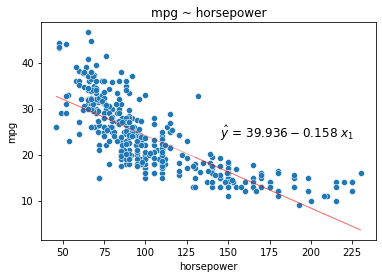

In [25]:
# Regression equation
regeq = f'$\haty$ = ${res.params[0].round(3)}{"+" if res.params[1] > 0 else ""}{res.params[1].round(3)} \ x_{1}$'

# Regression plot
ax = sns.scatterplot(x=df['horsepower'], y=df['mpg'])
ax.plot(df['horsepower'], res.predict(), color='red', linewidth=0.7, alpha=0.5)
plt.text(145, 24, regeq, fontsize=12, style='italic', color='black') 
plt.title('mpg ~ horsepower');

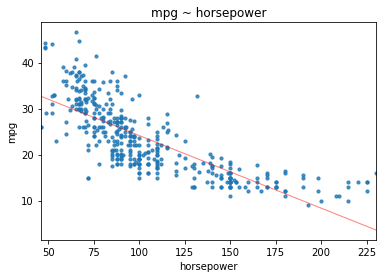

In [26]:
# or regression plot with 'order' option
sns.regplot(x=df.horsepower, y=df.mpg, ci=None, scatter=True, order=1,
            line_kws={'lw':1,'color':'red','alpha':0.5}, 
            scatter_kws={'s':10,'alpha':0.8}).set_title('mpg ~ horsepower');

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### c) Diagnostic plots for Residul Analysis
Produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

<b>Model assumptions</b><br>
For a linear model to be valid, a few conditions need to be true. They are called model assumptions.  
1. Linearity
2. Homoscedasticity
3. Normality
4. Independence

Diagnostic plots help us detect violations of model assumptions (except Independence, which can be checked by examining the study design).

\
<b>Diagnostic Plots</b><br>
[source](https://data.library.virginia.edu/diagnostic-plots/)

<b>1. Residuals v Fitted</b><br>
This plot helps in detecting non-linearity and/or heteroscedasticity. 
If there is a non-linear relationship between a predictor and response that has not been captured by the model, its presence could be revealed here.  
If the residuals are not roughly centered around 0 (standardized values outside the $\pm$ 2 range are of particular concern), that indicates a possible violation of linearity. If there seems to be a pattern to the scatter, that could be an indication of violation of the homoscedasticity assumption.

<b>2. Normal QQ  plot &rarr; standardized residuals</b><br>
This plot checks if residuals are normally distributed. Residuals are standardized before plotting.


<b>3. Scale-Location  &rarr; sqrt(studentized residuals) v Fitted Values</b><br>
Helps in detecting violation of the assumption of homoscedasticity. 
This plot shows if residuals are spread evenly along the range of fitted values.


<b>4. Residuals v Leverage  &rarr; studentized residuals</b><br>
This plot helps in detecting influential cases with the help of Cook's distance. Cook's distance measures the extent of change in model's estimates when an observation is omitted from the data.
Any observation with a CD $\ge$ 1, or a CD substantially larger than others (highly influential data points), requires investigation.<br>
A more conservative threshold to flag observations for examination in small samples or for larger data sets:  [source](http://www.mvstats.com/Downloads/Supplements/Advanced_Regression_Diagnostics.pdf)  
$CooksD \ \ge \frac{4}{N} \ or \ \frac{4}{N−k−1}$ 

Useful links: 
[1](https://stats.stackexchange.com/questions/383468/interpreting-regression-diagnostic-plots), 
[2](https://dept-info.labri.fr/~thebault/STAT/Understanding_Diag_Plots.pdf), 
[3](https://data.library.virginia.edu/diagnostic-plots/), 
[4](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression7.html),
[5](https://online.stat.psu.edu/stat501/lesson/11/11.1), 
[6](https://daviddalpiaz.github.io/appliedstats/model-diagnostics.html), 
[More diagnostics](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression7.html)

<b>Residuals</b>

- Residuals  
$$r_{i} = y_{i} - \hat{y}_{i}$$


- Standardized (or normalized) residuals (aka internally studentized residuals)  
$$r_{i} = \frac{e_{i}} {\sqrt{MSE(1-h_{ii})}}$$  
$h_{ii}$ &rarr; leverage &emsp;
$MSE \Rightarrow$ Mean Squared Error &emsp;
$e_{i} \rightarrow$ error


- Studentized residuals (aka Deleted t residual)  
$$t_i=\frac{d_i}{s(d_i)}=\frac{e_i}{\sqrt{MSE_{(i)}(1-h_{ii})}}$$  
$d_i = y_i-\hat{y}_{(i)}$  
$y_{i}$ &rarr; ith observation  
$\hat{y}_{(i)}$ &rarr; prediction based on a model with the ith observation deleted  
$MSE_{(i)}$ &rarr; MSE based on a model with the ith observation deleted


- Absolute standardized residuals

<b>Outliers:</b><br>
    a data point that breaks away from the general trend of the data to an abnormal degree.

<b>High Leverage point:</b><br>
    an extreme x value, or unusual combination of predictor values

<b>Influential observations:</b><br> 
    an observation that unduly influences any part of the regression analysis such as predicted responses, estimated slope coefficients or the hypothesis test results.

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

##### Functions to replicate R's diagnostic polts for lm() residual analysis
[Source](https://towardsdatascience.com/going-from-r-to-python-linear-regression-diagnostic-plots-144d1c4aa5a)

In [27]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats

###### Residuals vs Fitted

In [28]:
# Residuals vs Fitted
def dp1(fitted_model):
    residuals = fitted_model.resid
    fitted = fitted_model.fittedvalues
    smoothed = lowess(residuals,fitted)
    top3 = abs(residuals).sort_values(ascending = False)[:3]

    fig, ax = plt.subplots()
    ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none', s=20)
    ax.axhline(y=-3, color='k', ls=':', lw=0.3)
    ax.axhline(y=3, color='k', ls=':', lw=0.3)
    ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax.set_ylabel('Residuals')
    ax.set_xlabel('Fitted Values')
    ax.set_title('Residuals vs. Fitted')
    ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

    for i in top3.index:
        ax.annotate(i,xy=(fitted[i],residuals[i]))

###### Normal QQ

In [29]:
## Normal QQ
def dp2(fitted_model):
    sorted_student_residuals = pd.Series(fitted_model.get_influence().resid_studentized_internal)
    sorted_student_residuals.index = fitted_model.resid.index
    sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
    df = pd.DataFrame(sorted_student_residuals)
    df.columns = ['sorted_student_residuals']
    df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
    rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
    top3 = rankings[:3]

    fig, ax = plt.subplots()
    x = df['theoretical_quantiles']
    y = df['sorted_student_residuals']
    ax.scatter(x,y, edgecolor = 'k',facecolor = 'none', s=20)
    ax.set_title('Normal Q-Q')
    ax.set_ylabel('Standardized Residuals')
    ax.set_xlabel('Theoretical Quantiles')
    ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
    for val in top3.index:
        ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))

###### Scale - location

In [30]:
# Scale - location
def dp3(fitted_model):
    fitted = fitted_model.fittedvalues
    student_residuals = fitted_model.get_influence().resid_studentized_internal
    sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
    sqrt_student_residuals.index = fitted_model.resid.index
    smoothed = lowess(sqrt_student_residuals, fitted)
    top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

    fig, ax = plt.subplots()
    ax.scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none', s=20)
    ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax.set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
    ax.set_xlabel('Fitted Values')
    ax.set_title('Scale-Location')
    ax.set_ylim(0,max(sqrt_student_residuals)+0.1)
    for i in top3.index:
        ax.annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
    plt.show();

###### Residuals v Leverage

In [31]:
## Residuals vs. Leverage
def dp4(fitted_model):
    student_residuals = pd.Series(fitted_model.get_influence().resid_studentized_internal)
    student_residuals.index = fitted_model.resid.index
    df = pd.DataFrame(student_residuals)
    df.columns = ['student_residuals']
    df['leverage'] = fitted_model.get_influence().hat_matrix_diag
    smoothed = lowess(df['student_residuals'],df['leverage'])
    sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
    sorted_leverage = df['leverage'].sort_values(ascending = False)
    top3 = sorted_leverage[:3]

    fig, ax = plt.subplots()
    x = df['leverage']
    y = df['student_residuals']
    xpos = max(x)+max(x)*0.01  
    ax.scatter(x, y, edgecolors = 'k', facecolors = 'none', s=20)
    ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax.set_ylabel('Studentized Residuals')
    ax.set_xlabel('Leverage')
    ax.set_title('Residuals vs. Leverage')
    ax.set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
    # ax.set_xlim(-0.01,max(x)+max(x)*0.05)
    plt.tight_layout()
    for val in top3.index:
        ax.annotate(val, xy=(x.loc[val],y.loc[val]))

    cooksx = np.linspace(min(x), xpos, 50)
    p = len(fitted_model.params)
    poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
    poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
    negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
    negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

    ax.plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
    ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
    ax.plot(cooksx,negcooks1y, ls = ':', color = 'r')
    ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
    ax.plot([0,0],ax.get_ylim(), ls=":", alpha = .3, color = 'k')
    ax.plot(ax.get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')

    xlim_l, xlim_u = ax.get_xlim()
    ylim_l, ylim_u = ax.get_ylim()

    if (poscooks1y[-1] < ylim_u):
        ax.annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
    if (poscooks05y[-1] < ylim_u):
        ax.annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
    if (negcooks1y[-1] > ylim_l):
        ax.annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
    if (negcooks05y[-1] > ylim_l):
        ax.annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
    ax.legend()
    plt.show();

###### Diagnostic plots

In [32]:
# Get all
def lm_diagnostic_plots(fitted_model, which=None):
    if which == None:
        dp1(fitted_model)
        dp2(fitted_model)
        dp3(fitted_model)
        dp4(fitted_model)
    elif (type(which) == int) and (int(which) >= 1) and (int(which) <= 4):
        plots = [dp1, dp2, dp3, dp4]
        return plots[which-1](fitted_model)
    else:
        print('Invalid input')

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

___Alternative___  
Sources [1](https://nbviewer.jupyter.org/github/emredjan/ISL-python/blob/master/exercises/exercises_3.7_linear_regression.ipynb), [2](https://botlnec.github.io/islp/sols/chapter3/exercise9/)

In [33]:
def lm_diagnostic_plots2(fitted_model, df, response_var, plot_dim=(15,18), xlims=True):
    from statsmodels.graphics.gofplots import ProbPlot
    from scipy.stats import f as fdist

    y_pred = fitted_model.fittedvalues
    resids = fitted_model.resid
    std_resids = pd.Series(fitted_model.get_influence().resid_studentized_internal)
    std_resids.index = resids.index    # reindexing is reqd to adjust for rows (?) removed
    abs_std_resids = np.abs(std_resids)
    ur_abs_std_resids = np.sqrt(abs_std_resids)
    lev = pd.Series(fitted_model.get_influence().hat_matrix_diag)
    lev.index = resids.index
    cooks_d = pd.Series(fitted_model.get_influence().cooks_distance[0])
    cooks_d.index = resids.index
    ext_std_resids = pd.Series(fitted_model.get_influence().resid_studentized_external)
    ext_std_resids.index = resids.index
    global model_diagnostics
    model_diagnostics = pd.DataFrame(pd.concat([y_pred,resids,std_resids,ext_std_resids,lev,cooks_d],
                                              axis=1))
    model_diagnostics.columns = ['y_pred','resids','int_std_resids','ext_std_resids','leverage','cooks_d']

    ### Residual Plots
    f, axs = plt.subplots(4, 2, sharex=False, sharey=False, figsize=plot_dim)
    plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.95)
    plt.suptitle('Residual Analysis', fontsize=17).set_position([.5, 1.00])

    ## Residuals v Fitted
    sns.residplot(x=y_pred, y=fitted_model.fittedvalues+fitted_model.resid, data=df, 
                  ax=axs[0,0], lowess=True,
                  scatter_kws={'alpha':0.8, 's':15, 'facecolors':'none'}, 
                  line_kws={'color':'r', 'lw':0.5}).set_title('Residuals v Fitted')
    if xlims:
        xmin, xmax = axs[0,0].get_xlim()
        axs[0,0].set_xlim(xmin-((xmax-xmin)/10), xmax+(xmax-xmin)/10)
    axs[0,0].set_ylabel('Residuals')
    axs[0,0].set_xlabel('Fitted Values')
    top_abs_resids = np.abs(resids).sort_values(ascending=False)[:3]
    for i in top_abs_resids.index:
        axs[0,0].annotate(i, xy=(y_pred[i], resids[i]), fontsize=10)


    ## Normal QQ
    qq = ProbPlot(std_resids)
    qq.qqplot(ax=axs[0,1], marker='o', alpha=0.8, markersize=4, 
              markeredgecolor='steelblue', markerfacecolor='none')
    sm.qqline(ax=axs[0,1], line='45', fmt='k--', lw=0.2)
    axs[0,1].set_title('Normal Q-Q')
    axs[0,1].set_ylabel('Standardized Residuals')
    for r,i in enumerate(top_abs_resids.index):
        axs[0,1].annotate(i, xy=(np.flip(qq.theoretical_quantiles, 0)[r], std_resids[i]), fontsize=10)


    ## Scale-Location
    axs[1,0].scatter(x=y_pred, y=ur_abs_std_resids, alpha=0.8, s=15, facecolor='none', 
                     edgecolor='steelblue')
    sns.regplot(x=y_pred, y=ur_abs_std_resids, ax=axs[1,0], scatter=False, ci=False, lowess=True,
               line_kws={'color':'r', 'lw':0.5}).set_title('Scale-Location')
    axs[1,0].set_xlabel('Fitted Values')
    axs[1,0].set_ylabel('$\sqrt{|\; Standardized \;\ Residuals\; |}$', fontsize=10)
    if xlims:
        xmin, xmax = axs[1,0].get_xlim()
        axs[1,0].set_xlim(xmin-((xmax-xmin)/10), xmax+(xmax-xmin)/10)
    for i in top_abs_resids.index:
        axs[1,0].annotate(i, xy=(y_pred[i], ur_abs_std_resids[i]), fontsize=10)


    ## Residuals v Leverage
    axs[1,1].scatter(x=lev, y=std_resids, alpha=0.8, s=15, facecolor='none', edgecolor='steelblue')
    sns.regplot(ax=axs[1,1], x=lev, y=std_resids, scatter=False, ci=False, lowess=True,
                line_kws={'color':'r', 'lw':0.5})
    axs[1,1].set_title('Residuals v Leverage')
    axs[1,1].set_ylabel('Standardized Residuals')
    axs[1,1].set_xlabel('Leverage')
    xmin, xmax = axs[1,1].get_xlim()
    axs[1,1].set_xlim(-0.001, xmax*1.05)
    top_cd = cooks_d.sort_values(ascending=False)[:3]
    for i in top_cd.index:
        axs[1,1].annotate(i, xy=(lev[i], std_resids[i]), fontsize=9)


    ## Cook's distance
    gs = axs[2, 0].get_gridspec()
    f.delaxes(axs[2,0])
    f.delaxes(axs[2,1])
    f.add_subplot(gs[2,:])
    plt.bar(x=df.index, height=cooks_d)
    ymin, ymax = plt.gca().get_ylim()
    cook_th = fdist.ppf(q=0.5, dfn=fitted_model.df_model+1, dfd=(fitted_model.df_resid))
    th2 = 4 / fitted_model.df_resid
    for i in [th2, 0.5, cook_th, 1]:
        if ymax > i:
            plt.axhline(y=i, color='k', ls='--', lw=0.5)
    plt.title("Cook's Distance")
    plt.xlabel('Observation No.')
    plt.ylabel("Cook's Distance")
    for i in top_cd.index:
        plt.annotate(i, xy=(i, cooks_d[i]), fontsize=9)
    
    
    ## Externally studentized residuals
    axs[3,0].scatter(x=y_pred, y=ext_std_resids, alpha=0.8, s=15, facecolor='none', 
                     edgecolor='steelblue')
    for i in [-3, 3]:
        axs[3,0].axhline(y=i, color='r', ls='--', lw=0.5)
    xmin, xmax = axs[3,0].get_xlim()
    axs[3,0].set_xlim(xmin-((xmax-xmin)/10), xmax+(xmax-xmin)/10)
    axs[3,0].set_ylabel('Residuals')
    axs[3,0].set_xlabel('Fitted Values')
    for i in ext_std_resids.index[abs(ext_std_resids) > 3]:
        axs[3,0].annotate(i, xy=(y_pred[i], ext_std_resids[i]), fontsize=8)
    axs[3,0].set_title("Externally Studentized Residual v Fitted Values")
    axs[3,0].set_xlabel('Fitted Values')
    axs[3,0].set_ylabel('Externally Studentized Residuals')
    
    
    axs[3,1].scatter(x=lev, y=ext_std_resids, alpha=0.8, s=15, facecolor='none', 
                     edgecolor='steelblue')
    axs[3,1].axvline(x=3*(fitted_model.df_model+1)/(fitted_model.df_resid+fitted_model.df_model+1),
                     color='grey', ls='--', lw=0.5)
    sns.regplot(ax=axs[3,1], x=lev, y=ext_std_resids, scatter=False, ci=False, lowess=True,
                line_kws={'color':'r', 'lw':0.5})
    axs[3,1].set_title('Externally Studentized Residuals v Leverage')
    axs[3,1].set_ylabel('Externally Studentized Residuals')
    axs[3,1].set_xlabel('Leverage')
    xmin, xmax = axs[3,1].get_xlim()
    axs[3,1].set_xlim(-0.001, xmax*1.05)
    top_cd = cooks_d.sort_values(ascending=False)[:3]
    for i in top_cd.index:
        axs[3,1].annotate(i, xy=(lev[i], ext_std_resids[i]), fontsize=9)
    notable_cd = cooks_d[cooks_d > 0.5]
    for i in notable_cd.index:
        if cooks_d[i] > 1:
            axs[3,1].annotate(i, xy=(lev[i], ext_std_resids[i]), fontsize=9, color='r')
        else:
            axs[3,1].annotate(i, xy=(lev[i], ext_std_resids[i]), fontsize=9, color='blue')

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

#### Diagnostic plots for the model

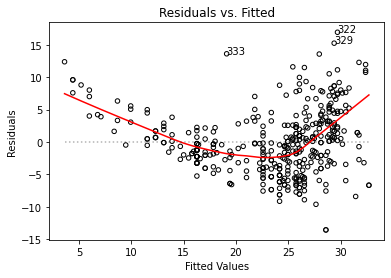

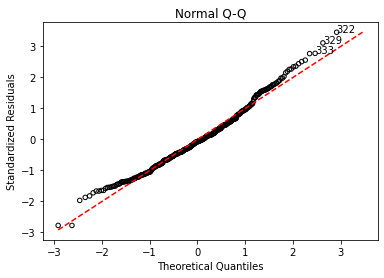

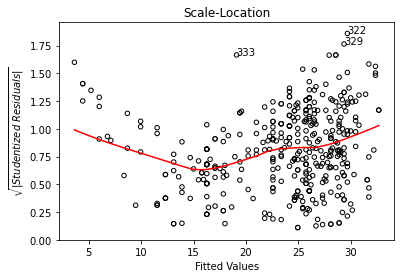

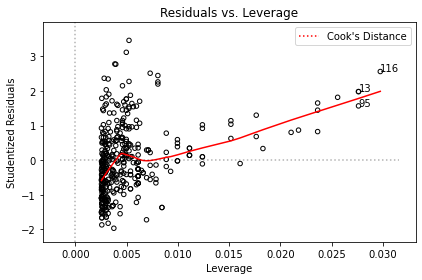

In [34]:
lm_diagnostic_plots(res)

<div class="alert alert-block alert-info">
<h5>Observations</h5><br>
    <b>Residuals v Fitted plot</b><br>
    - There is a very clear curved pattern in the scatter plot. This suggests violation of the assumption of linearity.<br>
    &ensp; Since linearity assumption is clearly violated, we can't judge for homoscedasticity from the plot yet.<br>
    <b>Normal QQ plot</b><br>
    - The assumption of normally distributed residuals is held up by the QQ plot.<br>
    <b>Scale-Location</b><br>
    - Here also, there is a curved pattern, which suggests violation of assumption of homoscedasticity.<br>
    <b>Residuals vs Leverage</b><br>
    - There are a few high leverage points but none of them has crossed the 0.5 Cook's Distance threshold.
</div>

In [35]:
from yellowbrick.regressor import CooksDistance, ResidualsPlot
# https://www.scikit-yb.org/en/latest/api/regressor/influence.html#cook-s-distance

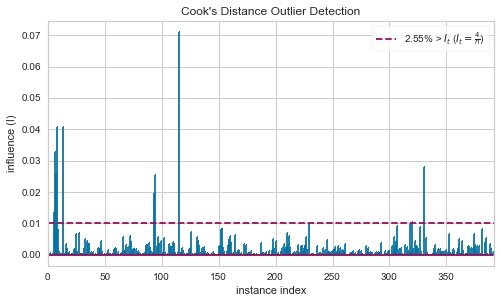

In [36]:
plt.figure(figsize=(8, 4.5))
cd = CooksDistance().fit(np.array(df['horsepower']).reshape(-1,1), np.array(df['mpg']))
cd.show();

In [37]:
sns.reset_orig()
sns.set_style(rc={'axes.facecolor':'w', 'figure.facecolor':'w'})

###### Residuals v Order
When autocorrelation needs to be checked

In [38]:
# Residuals vs. Order
def ordered_residuals(fitted_model):
    residuals = fitted_model.resid
    plt.figure(1, figsize=(15, 4))
    ax = sns.lineplot(x=list(range(residuals.shape[0])), y=residuals)
    plt.xlabel('Observation Order')
    plt.ylabel('Residuals')
    plt.box(on=None)
    plt.tick_params(left=False, bottom=False)
    plt.title('Residuals vs. Order', )

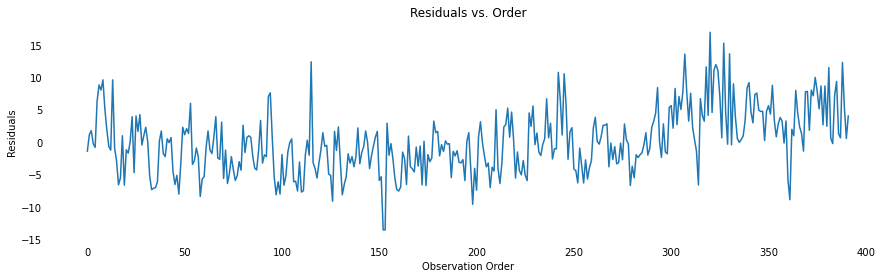

In [39]:
ordered_residuals(res)

[go to toc](#index)

<div align="center"><b>==============================================================================================================</b></div>

## Q9 - Multiple Linear Regression

### a) Scatterplot matrix
**Produce a scatterplot matrix which includes all of the variables in the data set.**

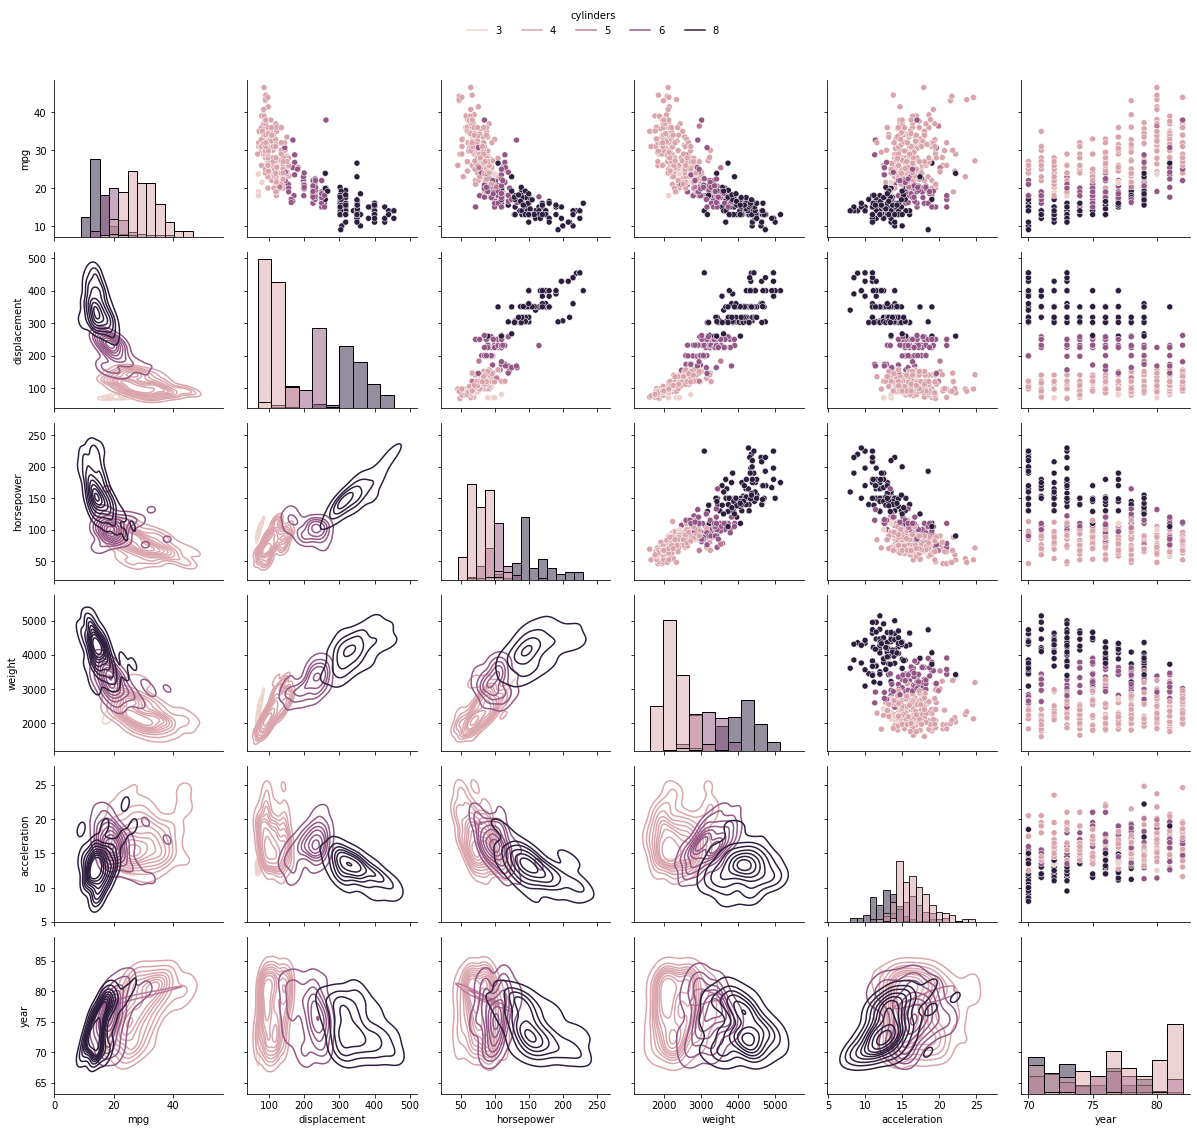

In [40]:
# Pairplot
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
#     sns.set_style("whitegrid", {'axes.grid' : False})
    fig = sns.PairGrid(df, vars=df.columns[~df.columns.isin(['cylinders','origin','name'])].tolist(), 
                       hue='cylinders')
    plt.gcf().set_size_inches(17,15)
    fig.map_diag(sns.histplot)
    fig.map_upper(sns.scatterplot)
    fig.map_lower(sns.kdeplot)
    fig.add_legend(ncol=5, loc=1, bbox_to_anchor=(0.5, 1.05), borderaxespad=0, frameon=False);

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### b) Correlation matrix
**Compute the matrix of correlations between the variables. You will need to exclude the name variable, which is qualitative.**

In [41]:
# Correlation matrix
cor = df.corr().round(3)
cor

mpg  cylinders  displacement  horsepower  weight  \
mpg           1.000     -0.778        -0.805      -0.778  -0.832   
cylinders    -0.778      1.000         0.951       0.843   0.898   
displacement -0.805      0.951         1.000       0.897   0.933   
horsepower   -0.778      0.843         0.897       1.000   0.865   
weight       -0.832      0.898         0.933       0.865   1.000   
acceleration  0.423     -0.505        -0.544      -0.689  -0.417   
year          0.581     -0.346        -0.370      -0.416  -0.309   
origin        0.565     -0.569        -0.615      -0.455  -0.585   

              acceleration   year  origin  
mpg                  0.423  0.581   0.565  
cylinders           -0.505 -0.346  -0.569  
displacement        -0.544 -0.370  -0.615  
horsepower          -0.689 -0.416  -0.455  
weight              -0.417 -0.309  -0.585  
acceleration         1.000  0.290   0.213  
year                 0.290  1.000   0.182  
origin               0.213  0.182   1.000

Numeric variables are automatically excluded by corr().

#### Correlation heatmap

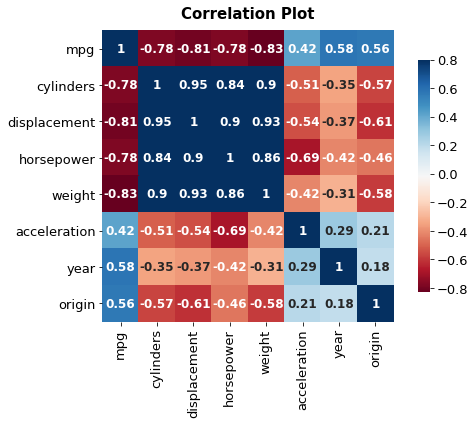

In [42]:
with sns.plotting_context(rc={"xtick.labelsize":13, 'ytick.labelsize':13}):
    f, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cor, vmax=.8, square=True, annot=True, cmap='RdBu', 
                annot_kws={"size":12, "weight":"semibold"}, cbar_kws={"shrink":.8})
    ax.set_title('Correlation Plot', fontsize=15, weight='semibold', pad=12)  # y=1.02; .set_position([.5, 1])
    # plt.subplots_adjust(top=1.0)
    f.tight_layout();

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### c) Multiple Linear Regression
Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. 
Print the results and comment on the output. 
For instance:  
i. Is there a relationship between the predictors and the response?  
ii. Which predictors appear to have a statistically significant relationship to the response?  
iii. What does the coefficient for the year variable suggest?

<b>Answer:</b><br>
Before running the regression, we should make sure that categorical variables are undertood as such by the model and treated accordingly.  
cylinders, origin and name are the categorical varibles.  
The numbers under cylinders are ordinal, so they will be taken as they are.  
The numbers under origin are nominal, so they have to be taken as nominal.  
name has been left out of the model.

origin : Origin of car (1. American, 2. European, 3. Japanese)

In [43]:
print(df.origin.dtypes)
df.origin.value_counts()

int64


1    245
3     79
2     68
Name: origin, dtype: int64

In [44]:
# Adding labels to origin
origin_code = {1:'amer', 2:'euro', 3:'jap'}
df.origin = df.origin.replace(origin_code).astype('category')
# df.origin = df.origin.map(origin_code).astype('category')
df.origin.dtype

CategoricalDtype(categories=['amer', 'euro', 'jap'], ordered=False)

In [45]:
formula_str = 'mpg ~ ' + ' + '.join(df.columns[~df.columns.isin(['mpg','name'])])
formula_str

'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'

To point out a categorical within the formula itself, without changing its dtype &ensp; &rarr; &ensp; 'mpg ~ C(origin) + other variables'

In [46]:
mreg = smf.ols(formula_str, data=df)
mres = mreg.fit()
mres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          1.79e-139
Time:                        01:29:10   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.9546      4.677     -3.839      0.000     -27.150      -8.759
origin[T.euro]     2.6300      0.566      4.643      0.000       1.516       3.744
origin[T.jap]      2.8532      0.553      5.162      0.000       1.766       3.940
cylinders         -0.4897      0.321     -1.524      0.128      -1.121       0.142
displacement       0.0240      0.008      3.133      0.002       0.009       0.039
horsepower        -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight            -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration       0.0791      0.098      0.805      0.421      -0.114       0.272
year               0.7770      0.052     15.005      0.000       0.675       0.879
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     8.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### i. Is there a relationship between the predictors and the response?
Yes.  

This question is answered by the p-value for the F-test statistic (224.5) that tests the null hypothesis that none of the predictors has a relationship with the response. Alternative hypothesis asserts that at least one of the predictors is correlated with the response variable.  

The p-value, 1.79e-139, is almost 0, which rejects the null hypothesis and gives us the statistical evidence to postulate that the response is related to at least one of the predictors.

#### ii. Which predictors appear to have a statistically significant relationship to the response?

origin, displacement, weight and year

The t-test for the variaous predictors result from the test which checks whether SSR (regression sum of squares) goes up by a significant enough amount to conclude that the inclusion of the predictor in a regression model, that already has all the other prdictors, is beneficial to the model. Taking the level of significance to be 5%, the variables that have P>|t| value lower than 0.05 can be considered statistically significant.

In [47]:
# predictors with significant p-values
pd.concat((mres.params[mres.pvalues < 0.05], mres.pvalues[mres.pvalues < 0.05]), axis=1, 
          keys=['coef', 'p-value']).round(4)

coef  p-value
Intercept      -17.9546   0.0001
origin[T.euro]   2.6300   0.0000
origin[T.jap]    2.8532   0.0000
displacement     0.0240   0.0019
weight          -0.0067   0.0000
year             0.7770   0.0000

#### iii. What does the coefficient for the year variable suggest?

$\beta_{year} = 0.777$

The coefficient states that, other factors being constant, each new year improves the average mpg of the cars coming out by a factor of 0.777.  That is, on the whole, newer models are getting more fuel efficient.

In [48]:
mres.params['year']

0.7770269391010212

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### d) Diagnostic plots
Produce diagnostic plots of the linear regression fit. 
Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? 
Does the leverage plot identify any observations with unusually high leverage?

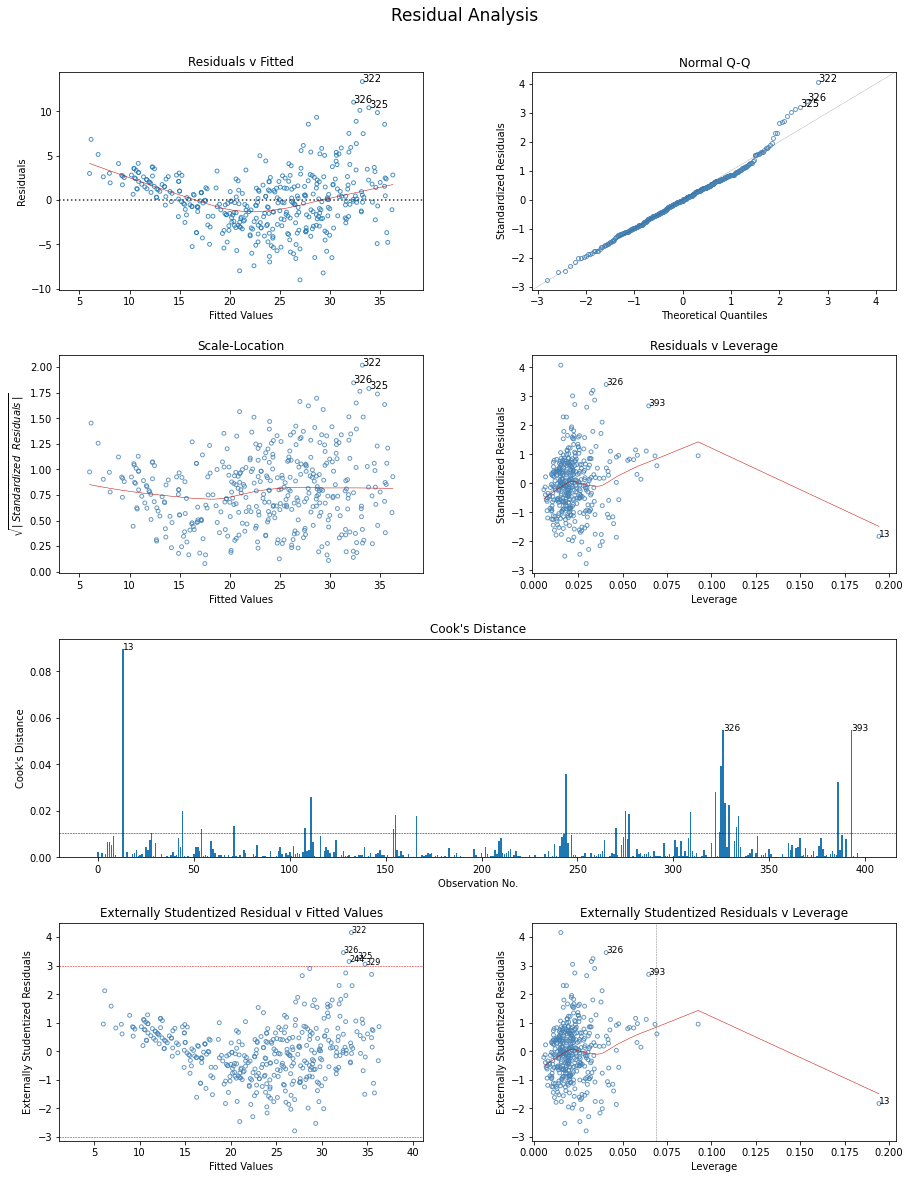

In [49]:
lm_diagnostic_plots2(mres, df, 'mpg')

<div class="alert alert-block alert-info">
<h5>Observations</h5><br>
    <b>Fit</b><br>
    - There is a very clear curved pattern in the Residuals v Fitted Values plot. The current model is not a good fit to the data. The shape of the scatter curve suggests that a square-root transformation may improve the linearity of the model.<br>
    <b>Outliers</b><br>
    - An effective measure to identify potential outliers is - Externally Studentized Residuals. An observation with externally studentized residual > 3 (in absolute value) is a possible outlier.<br>
    - In the Externally Studentized Residuals vs Fitted Values plot, 5 observations are flagged as possible outliers.<br>
    <b>Leverage</b><br>
    - Observations with $h_{ii}$ > 3p/n can be considered as having high leverage. In the Externally Studentized Residuals v Leverage plot, the grey vertical line represents the 3p/n threshold. <br> 
    - We can see that there are 3 observations with high leverage. Observation 14th has a leverage value much larger than others.<br>
    <b>Influential Observations</b><br>
    - Obs 14 has an unusually high leverage value and a relatively high externally studentized residual value. It may be disproportionately influencing the regression parameters.
</div>

<b>A Cook's distance threshold of &ensp; $\frac{4}{N - k - 1}$ &ensp; is used as a conservative measure to highlight potentially influential observations. Such observations have been marked in green in the plots below.</b>

In [50]:
model_diagnostics.head(2)

y_pred    resids  int_std_resids  ext_std_resids  leverage   cooks_d
0  14.953252  3.046748        0.932344        0.932184  0.023266  0.002301
1  14.040098  0.959902        0.292975        0.292625  0.018142  0.000176

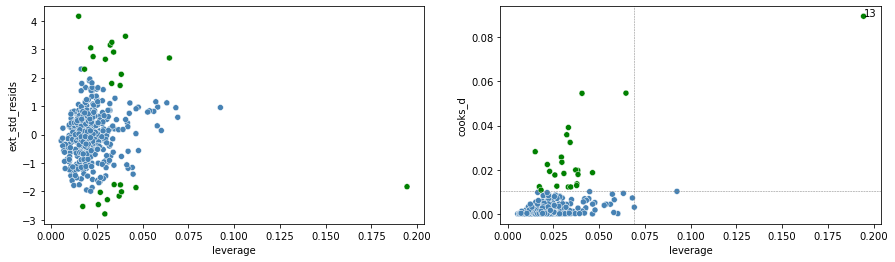

In [51]:
# Potentilly Highly Influential points
cooks_th = 4/mres.df_resid
gt_cooks_th = model_diagnostics.cooks_d > cooks_th
lev_th = 3*(mres.df_model+1) / (mres.df_resid+mres.df_model+1)

f, axs = plt.subplots(1,2, figsize=(15,4))
plt.subplot(121)
sns.scatterplot(x=model_diagnostics.leverage, y=model_diagnostics.ext_std_resids, hue=gt_cooks_th,
                palette=['steelblue','green'], legend=False)

plt.subplot(122)
sns.scatterplot(x=model_diagnostics.leverage, y=model_diagnostics.cooks_d, hue=gt_cooks_th,
                palette=['steelblue','green'], legend=False)
plt.axhline(y = cooks_th, color='grey', ls='--', lw=0.5)
plt.axvline(x = lev_th, color='grey', ls='--', lw=0.5)
marked = [i for i in model_diagnostics.index if (model_diagnostics.leverage[i] >= lev_th) and (model_diagnostics.cooks_d[i] >= cooks_th)]
for i in marked:
    plt.annotate(i, xy=(model_diagnostics.leverage[i], model_diagnostics.cooks_d[i]), fontsize=10)

##### Function to create influence plots

In [52]:
# Function to create influence plots
def influence_diagnostic_plots(fitted_model, model_diagnostics):
    cooks_th = 4/fitted_model.df_resid
    gt_cooks_th = model_diagnostics.cooks_d > cooks_th
    lev_th = 3*(fitted_model.df_model+1) / (fitted_model.df_resid+fitted_model.df_model+1)

    f, axs = plt.subplots(1,2, figsize=(15,4))
    plt.subplot(121)
    sns.scatterplot(x=model_diagnostics.leverage, y=model_diagnostics.ext_std_resids, hue=gt_cooks_th,
                    palette=['steelblue','green'], legend=False)

    plt.subplot(122)
    sns.scatterplot(x=model_diagnostics.leverage, y=model_diagnostics.cooks_d, hue=gt_cooks_th,
                    palette=['steelblue','green'], legend=False)
    plt.axhline(y = cooks_th, color='grey', ls='--', lw=0.5)
    plt.axvline(x = lev_th, color='grey', ls='--', lw=0.5)
    marked = [i for i in model_diagnostics.index if (model_diagnostics.leverage[i] >= lev_th) and (model_diagnostics.cooks_d[i] >= cooks_th)]
    for i in marked:
        plt.annotate(i, xy=(model_diagnostics.leverage[i], model_diagnostics.cooks_d[i]), fontsize=10)

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### e) Interaction effects
Fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

<b>Answer:</b><br>
To start with, a model with all interaction terms will be built.

#### Approach 1

In [53]:
# Formula string
formula_str = 'mpg ~ ' + ' + '.join(df.columns[~df.columns.isin(['mpg','name'])])

xvars = df.columns[~df.columns.isin(['mpg','name'])]
interactions = []
accounted = []
for i in xvars:
    for j in xvars:
        if (i != j) and (j not in accounted):
            interactions.append(f"{i}:{j}")
    accounted.append(i)
intr_form = ' + '.join(interactions)
formula_str = formula_str + ' + ' + intr_form
formula_str

'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + cylinders:displacement + cylinders:horsepower + cylinders:weight + cylinders:acceleration + cylinders:year + cylinders:origin + displacement:horsepower + displacement:weight + displacement:acceleration + displacement:year + displacement:origin + horsepower:weight + horsepower:acceleration + horsepower:year + horsepower:origin + weight:acceleration + weight:year + weight:origin + acceleration:year + acceleration:origin + year:origin'

In [54]:
# Function to return formula string
def regression_formula(yvar, xvars, interaction=False):
    formula_str = f'{yvar} ~ ' + ' + '.join(xvars)
    if interaction:
        interactions = []
        accounted = []
        for i in xvars:
            for j in xvars:
                if (i != j) and (j not in accounted):
                    interactions.append(f"{i}:{j}")
            accounted.append(i)
        intr_form = ' + '.join(interactions)
        formula_str = formula_str + ' + ' + intr_form
    return formula_str

In [55]:
# Regression model with interactions between all variables
imres1 = smf.ols(formula_str, data=df).fit()
imres1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     88.34
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          1.74e-153
Time:                        01:29:13   Log-Likelihood:                -916.16
No. Observations:                 392   AIC:                             1904.
Df Residuals:                     356   BIC:                             2047.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      44.0119     51.467      0.855      0.393     -57.206     145.230
origin[T.euro]                -35.1651     12.602     -2.790      0.006     -59.949     -10.381
origin[T.jap]                 -37.6464     14.261     -2.640      0.009     -65.693      -9.599
cylinders                       3.3016      8.187      0.403      0.687     -12.798      19.402
cylinders:origin[T.euro]       -0.7210      1.088     -0.662      0.508      -2.861       1.419
cylinders:origin[T.jap]         1.2256      1.007      1.217      0.224      -0.755       3.206
displacement                   -0.3529      0.197     -1.788      0.075      -0.741       0.035
displacement:origin[T.euro]    -0.0336      0.042     -0.797      0.426      -0.117       0.049
displacement:origin[T.jap]      0.0538      0.041      1.297      0.196      -0.028       0.135
horsepower                      0.5312      0.339      1.567      0.118      -0.135       1.198
horsepower:origin[T.euro]      -0.0049      0.051     -0.096      0.923      -0.104       0.095
horsepower:origin[T.jap]        0.0229      0.063      0.366      0.715      -0.100       0.146
weight                         -0.0033      0.018     -0.179      0.858      -0.039       0.033
weight:origin[T.euro]           0.0023      0.003      0.848      0.397      -0.003       0.008
weight:origin[T.jap]           -0.0045      0.003     -1.292      0.197      -0.011       0.002
acceleration                   -6.0483      2.147     -2.818      0.005     -10.270      -1.827
acceleration:origin[T.euro]     0.9234      0.264      3.496      0.001       0.404       1.443
acceleration:origin[T.jap]      0.7159      0.326      2.198      0.029       0.075       1.357
year                            0.4833      0.592      0.816      0.415      -0.682       1.648
year:origin[T.euro]             0.2932      0.144      2.031      0.043       0.009       0.577
year:origin[T.jap]              0.3139      0.148      2.116      0.035       0.022       0.606
cylinders:displacement         -0.0063      0.007     -0.889      0.375      -0.020       0.008
cylinders:horsepower            0.0145      0.025      0.591      0.555      -0.034       0.063
cylinders:weight                0.0006      0.001      0.631      0.529      -0.001       0.002
cylinders:acceleration          0.3658      0.167      2.189      0.029       0.037       0.695
cylinders:year                 -0.1447      0.097     -1.499      0.135      -0.334       0.045
displacement:horsepower     -5.407e-05      0.000     -0.189      0.850      -0.001       0.001
displacement:weight          2.659e-05   1.45e-05      1.828      0.068   -2.02e-06    5.52e-05
displacement:acceleration      -0.0025      0.003     -0.759      0.448      -0.009       0.004
displacemen

In [56]:
# Variables with statistically significant coefficients (alpha = 5%)
sig_imres1 = pd.concat([imres1.params[imres1.pvalues < 0.05], 
                        imres1.pvalues[imres1.pvalues < 0.05]], axis=1, 
                       keys=['coef','p-value']).round(4)
sig_imres1

coef  p-value
origin[T.euro]              -35.1651   0.0055
origin[T.jap]               -37.6464   0.0087
acceleration                 -6.0483   0.0051
acceleration:origin[T.euro]   0.9234   0.0005
acceleration:origin[T.jap]    0.7159   0.0286
year:origin[T.euro]           0.2932   0.0430
year:origin[T.jap]            0.3139   0.0350
cylinders:acceleration        0.3658   0.0293
acceleration:year             0.0614   0.0164

<div class="alert alert-block alert-info">
<b>Statistically significant interactions</b><br>
- acceleration-origin<br>
- year-origin<br>
- cylinders-acceleration<br>
- acceleration-year
</div>

##### VIF

In [57]:
# Function to get VIF values
from sklearn.linear_model import LinearRegression

def sklearn_vif(exogs, data):
    vif_dict, tolerance_dict = {}, {}
    for exog in exogs:
        # form input data for each exogenous variable
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]
        
        r_squared = LinearRegression().fit(X, y).score(X, y)
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})
    return df_vif

# https://stackoverflow.com/a/54857466/12818901

In [58]:
exogs = list(xvars)
exogs.remove('origin')   # categorical variable removed
exogs

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']

In [59]:
vif = sklearn_vif(exogs=exogs, data=df)
vif

VIF  Tolerance
cylinders     10.633049   0.094046
displacement  19.641683   0.050912
horsepower     9.398043   0.106405
weight        10.731681   0.093182
acceleration   2.625581   0.380868
year           1.244829   0.803323

<div class="alert alert-block alert-info">
VIF >= 10 indiacates a high level of multicollinearity. We can see that many variables are highly correlated.<br>  
displacement has an extremely high VIF at 19.64. It can be considered for removal to mitigate collinearity.
</div>

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

#### Approach 2
- Remove variables with extremely high VIF.
- Run multiple regression again to identify significant variables.
- Using the significant variables, add interaction terms.

##### VIF

In [60]:
# VIF after removing high VIF variable
exogs.remove('displacement')     # variable with very high VIF (19) removed
vif = sklearn_vif(exogs=exogs, data=df)
vif

VIF  Tolerance
cylinders     5.859121   0.170674
horsepower    8.867796   0.112768
weight        8.646446   0.115654
acceleration  2.593284   0.385611
year          1.238072   0.807707

<div class="alert alert-block alert-info">
VIF has dropped below 10 for all variables.
</div>

##### Regression model

In [61]:
xvars = df.columns[~df.columns.isin(['mpg','displacement','name'])]
formula_str = regression_formula('mpg', xvars, interaction=False)
formula_str

'mpg ~ cylinders + horsepower + weight + acceleration + year + origin'

In [62]:
mres2 = smf.ols(formula_str, data=df).fit()
mres2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     249.4
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          1.37e-138
Time:                        01:29:14   Log-Likelihood:                -1025.4
No. Observations:                 392   AIC:                             2067.
Df Residuals:                     384   BIC:                             2099.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -18.6146      4.726     -3.939      0.000     -27.906      -9.323
origin[T.euro]     2.0227      0.538      3.758      0.000       0.964       3.081
origin[T.jap]      2.3172      0.532      4.359      0.000       1.272       3.362
cylinders          0.1610      0.248      0.649      0.516      -0.326       0.648
horsepower        -0.0056      0.013     -0.419      0.675      -0.032       0.021
weight            -0.0059      0.001     -9.704      0.000      -0.007      -0.005
acceleration       0.0488      0.099      0.494      0.622      -0.146       0.243
year               0.7593      0.052     14.585      0.000       0.657       0.862
==============================================================================
Omnibus:                       29.159   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.689
Skew:                           0.495   Prob(JB):                     4.41e-11
Kurtosis:                       4.393   Cond. No.                     8.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-info">
Coefficients for cylinders, horsepower and acceleration have p-values < 5%.<br>
For the next model, cylinders and horsepower will not be considered while acceleration will be retained because its interactions with 3 other variables were significant in mres1.
</div>

In [63]:
xvars = ['weight','acceleration','origin','year']
formula_str = regression_formula('mpg', xvars, interaction=True)
formula_str

'mpg ~ weight + acceleration + origin + year + weight:acceleration + weight:origin + weight:year + acceleration:origin + acceleration:year + origin:year'

In [64]:
imres2 = smf.ols(formula_str, data=df).fit()
imres2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     177.5
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          3.52e-156
Time:                        01:29:14   Log-Likelihood:                -963.92
No. Observations:                 392   AIC:                             1958.
Df Residuals:                     377   BIC:                             2017.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -51.8366     29.561     -1.754      0.080    -109.961       6.288
origin[T.euro]                -11.1988     10.106     -1.108      0.268     -31.069       8.672
origin[T.jap]                   5.8936     10.802      0.546      0.586     -15.347      27.134
weight                          0.0193      0.005      3.514      0.000       0.009       0.030
weight:origin[T.euro]          -0.0023      0.001     -2.779      0.006      -0.004      -0.001
weight:origin[T.jap]           -0.0033      0.001     -2.577      0.010      -0.006      -0.001
acceleration                   -2.3032      1.327     -1.736      0.083      -4.913       0.306
acceleration:origin[T.euro]     0.6938      0.164      4.219      0.000       0.370       1.017
acceleration:origin[T.jap]      0.2723      0.242      1.125      0.261      -0.203       0.748
year                            1.1860      0.382      3.104      0.002       0.435       1.937
origin[T.euro]:year             0.1001      0.133      0.751      0.453      -0.162       0.362
origin[T.jap]:year             -0.0114      0.123     -0.093      0.926      -0.253       0.230
weight:acceleration         -7.642e-05   9.22e-05     -0.829      0.408      -0.000       0.000
weight:year                    -0.0003   7.34e-05     -4.378      0.000      -0.000      -0.000
acceleration:year               0.0326      0.016      1.975      0.049       0.000       0.065
==============================================================================
Omnibus:                       25.665   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.349
Skew:                           0.385   Prob(JB):                     1.92e-11
Kurtosis:                       4.558   Cond. No.                     4.87e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Statistically significant coefficients

In [65]:
# Variables with statistically significant coefficients (alpha = 5%)
sig_imres2 = pd.concat([imres2.params[imres2.pvalues < 0.05], 
                        imres2.pvalues[imres2.pvalues < 0.05]], axis=1, 
                       keys=['coef','p-value']).round(4)
sig_imres2

coef  p-value
weight                       0.0193   0.0005
weight:origin[T.euro]       -0.0023   0.0057
weight:origin[T.jap]        -0.0033   0.0103
acceleration:origin[T.euro]  0.6938   0.0000
year                         1.1860   0.0021
weight:year                 -0.0003   0.0000
acceleration:year            0.0326   0.0489

<div class="alert alert-block alert-info">
<b>Statistically significant interactions are :</b><br>  
- weight-origin<br>
- weight-year<br>
- accelaration-origin<br>
- accelaration-year<br>

acceleration by itself may not have statistically significant coefficient, but will be retained nonetheless because of the heirarchy principle which stipulates the inclusion of the main effect in the model if its interaction term is statistically significant.
</div>

##### Diagnostic plots

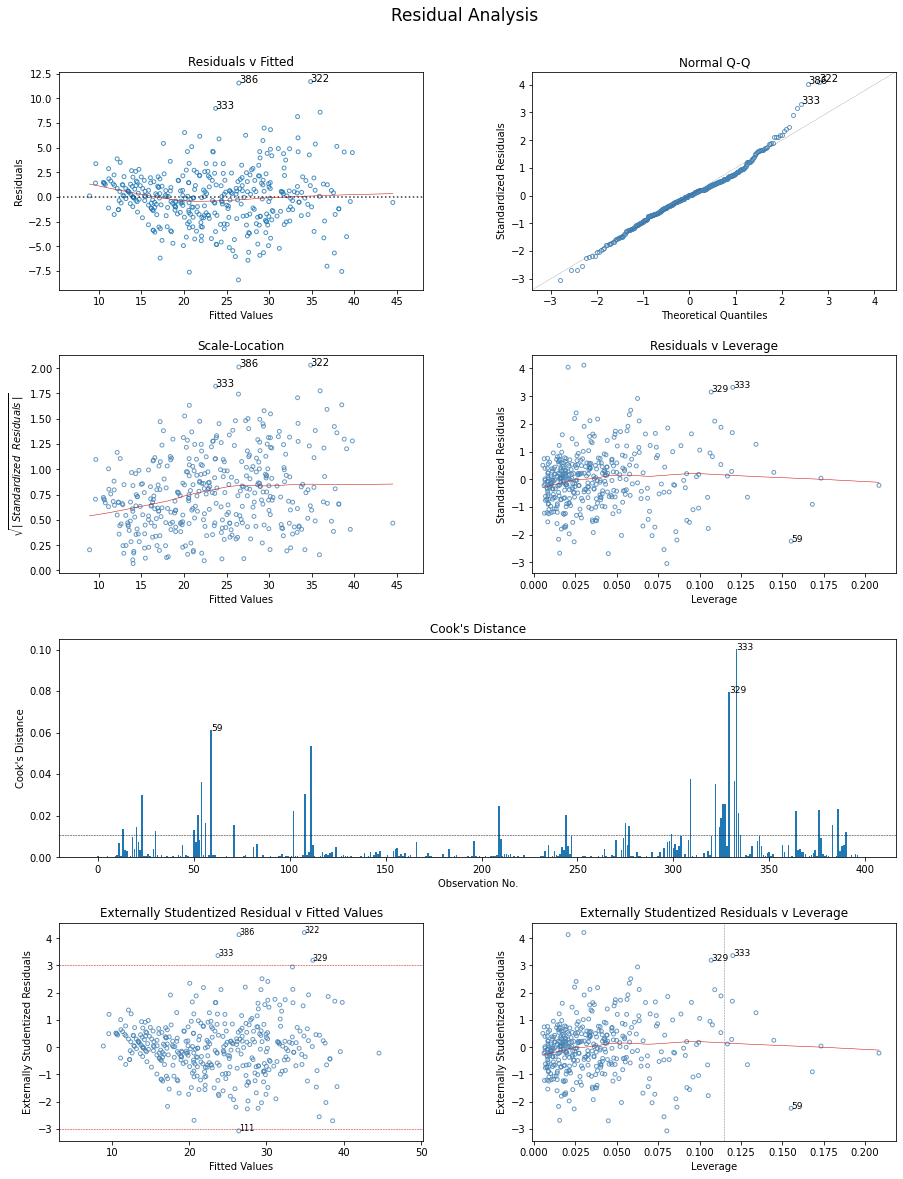

In [66]:
# Diagnostic plots
lm_diagnostic_plots2(imres2, df, 'mpg')

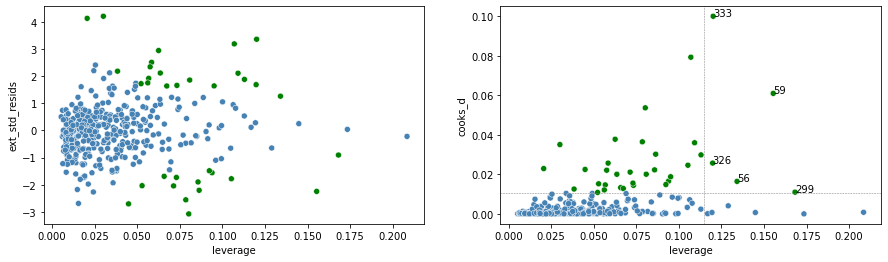

In [67]:
influence_diagnostic_plots(imres2, model_diagnostics)

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### Defined functions

##### Fuction to plot a variable against all others

In [68]:
def multiplot(data, yvar, numcols, plot_dim=None, huedata=None):
    vars = data.columns[~data.columns.isin([yvar])].tolist()
    n = len(vars)
    rws = n//numcols if n%numcols == 0 else (n//numcols)+1
    plot_dim = (17, rws*3.5) if plot_dim is None else plot_dim
    
    f, axs = plt.subplots(rws, numcols, figsize=plot_dim)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    
    r, c = 0, 0
    for i in range(n):
        plt.sca(axs[r,c])
        var = vars[i]
        if huedata is None:
            sns.scatterplot(x=data[var], y=data[yvar], legend=False)
        else:
            sns.scatterplot(x=data[var], y=data[yvar], hue=huedata, palette='seismic_r', s=25,
                        linewidth=0.15, alpha=1, edgecolor='k', legend=False)
        plt.title(var, fontsize=15)
        plt.xlabel('')
        
        if c == numcols-1:
            c = 0
            r += 1
            continue
        else:
            c += 1
        
    extra_grids = rws*numcols - n
    for k in range(numcols-extra_grids, numcols):
        f.delaxes(axs[r,k])

##### Function to perform variable transformation and get results

In [69]:
# Function to perform variable transformation and get results
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

def transformation_result(y, X, data, yvar, transformation=None, diag_plots=False, rsq_only=False):
    '''transformations: ['no', log', 'ur', power] (power denotes order : X^power)'''
    
    if X.dtype.kind in 'biufc':
        pwr = transformation if isinstance(transformation, int) else 1
        if transformation == 'no':
            tX = X
        elif transformation == 'log':
        # Handling negative values for log transformation 
        # https://www.kaggle.com/lmorgan95/islr-linear-regression-ch-3-solutions
        # https://blogs.sas.com/content/iml/2011/04/27/log-transformations-how-to-handle-negative-data-values.html
            if min(X) <= 0 :   
                tX = np.log(X + abs(min(X)) + 1)
            else:
                tX = np.log(X)
        elif transformation == 'ur':
            if min(X) <= 0 :
                tX = (X + abs(min(X)))**(-1/2)    # suggested in above blog
            else:
                tX = X**(-1/2)
        elif isinstance(transformation, int):    
            poly_X = PolynomialFeatures(degree=pwr)
            tX = poly_X.fit_transform(np.array(X).reshape(-1,1))
        else:
            return print('Provide appropriate form of transformation.')
    
        # fit the model
        model = sm.OLS(y, sm.add_constant(tX)).fit()
        
    elif X.dtype.name == 'category':
        model = sm.OLS(y, sm.add_constant(pd.get_dummies(X))).fit()
    
    else:
        return print('Check X variable type.')
    
    rsq = model.rsquared
    fpval = model.f_pvalue
    
    if rsq_only:
        return rsq
    
    if not(diag_plots):
        return model.summary()
        
    else:
        print(f'rsq : {rsq}\np-value : {fpval}')
        rel_X = tX if (transformation == 'log') or (transformation == 'ur') else X
        sns.regplot(x=rel_X, y=y, ci=False, order=pwr, line_kws={'color':'r', 'lw':0.7}, 
                    scatter_kws={'alpha':0.8, 's':17, 'facecolors':'none', 'edgecolors':'steelblue'})
#         dp1(model)
#         dp2(model)
#         dp3(model)
        lm_diagnostic_plots2(model, data, yvar)

##### Function to return table of R-squared values

In [70]:
# Function to return table of R-squared values
def rsq_df(yvar, xvars, data):
    if isinstance(xvars, str):
        xvars = [xvars]
    xvars = [x for x in xvars if (data[x].dtype.kind in 'bifuc') or (data[x].dtype.name=='category')]
    if yvar in xvars:
        xvars.remove(yvar)
        
    rsqdf = pd.DataFrame(columns=['no','log','ur', 2], index=xvars)
    for x in xvars:
        if data[x].dtype.kind in 'biufc':
            for trfm in ['no','log','ur', 2]:
                rsqdf.loc[x,trfm] = transformation_result(df.mpg, df[x], data, yvar,
                                                          transformation=trfm,rsq_only=True)
        elif data[x].dtype.name == 'category':
            rsqdf.loc[x] = [transformation_result(df.mpg, df[x], data, yvar, transformation='no', 
                                                  rsq_only=True),
                            np.nan, np.nan, np.nan]
            
    rsqdf.columns = ['x','log(x)','$\sqrt{x}$', '$x^2$']
    print(f'R-squared values for :\n{yvar} ~ transformations of x')
    return rsqdf.astype('float64')

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### f) Transformations
Try a few different transformations of the variables, such as $\ log(X), \sqrt{X}, X^2\ $. Comment on your findings.

<b>Answer:</b><br>
To get a clue about the transformations required, we should plot the response variable against the predictors.

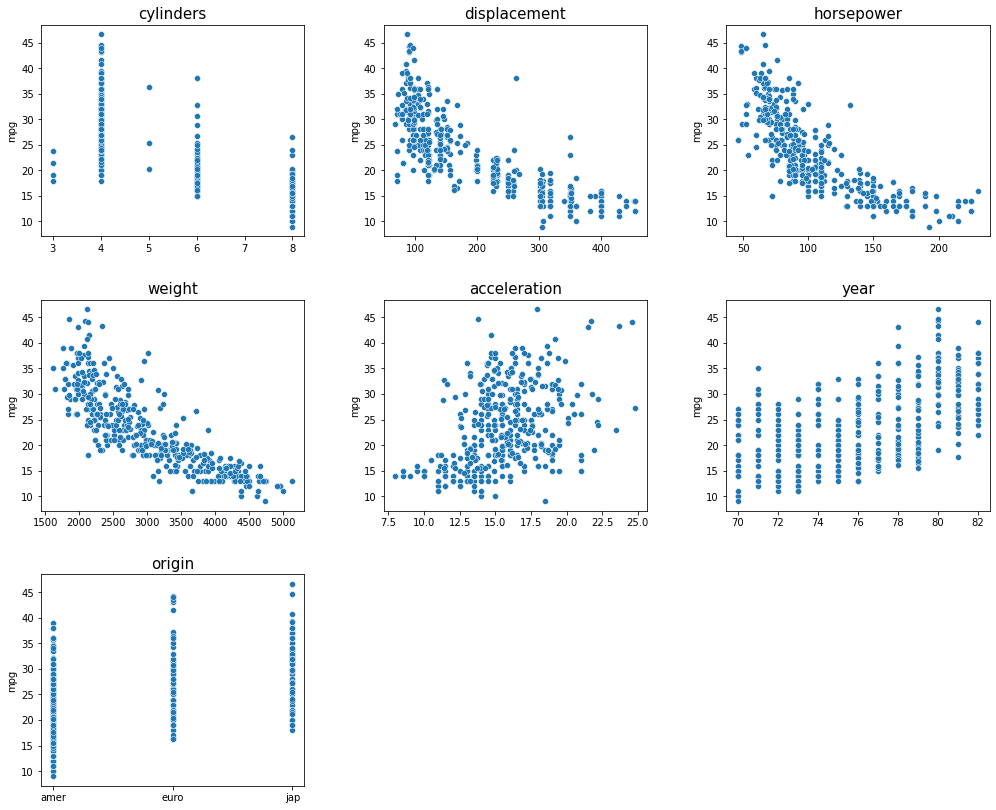

In [71]:
multiplot(df.drop('name', axis=1), 'mpg', 3, plot_dim=(17,14))

<div class="alert alert-block alert-info">
- The shapes of scatter (gentle downward curving slope) in the displacement, horsepower and weight plots suggest that a log transformation or a quadratic transformation of the x variable would work.<br>
- Acceleration has a slightly funnel like shape.
</div>

#### Table of R-squared values after variable transformations
[Inspiration](https://www.kaggle.com/lmorgan95/islr-linear-regression-ch-3-solutions)

Let's calculate r-squared values from response variable regressed on each predictor variable and its transformed and untransformed versions. It can give an idea as to which transformations are useful.

In [72]:
tempdf = rsq_df('mpg', df.columns, df)
tempdf.style.highlight_min(color='#FFD4AA', axis=1).highlight_max(color='lightgreen', axis=1)\
.format("{:.3}")

R-squared values for :
mpg ~ transformations of x


<div class="alert alert-block alert-info">
<h4><i>Observations</i></h4><br>
    Quadratic transformation (wherever applicable) has yielded the highest r-squared value for all predictors. Part of the reason could be because a quadratic model increases the flexibility of the estimated model, allowing it to fit to the data more closely. But if that is due to a better assimilation of the relationship or due to overfitting, will have to checked with the help of diagnostic plots.<br><br>
    - <b>cylinders</b><br>(workings below)<br>
    R-squared value for the untransformed predictor and $x^2$ transformation is almost equal and there isn't much difference in the diagnostic plots except for a few x values becoming more leveraged after the transformation.<br><br>
    - <b>displacement, weight and acceleration</b><br>(workings below)<br>
    There is some small difference between the R-squared values of the untransformed predictor and the $x^2$ transformed predictor version. But r-squared values for $log(x)$ and $x^2$ transformations are very close. Comparing the diagnostic plots, it was observed that the diagnostic patterns were very similar in both transformations, except for the quadratic transformation having slightly more compressed spread for lower $\hat{y}$ values.<br>
    There is an increase of .041, .022 and .015 in r-squared score between untransformed and largest r-squared from transformed data for displacement, weight and acceleration respectively.<br><br>
    - <b>horsepower</b><br>(workings below)<br>
    Residuals before transformation have a curved and conical pattern, but the curve is corrected after $x^2$ transformation. y transformation could take care of the unequal variance.<br><br>
    - <b>year</b><br>(workings below)<br>
    There is a very slight curve pattern in the residuals plot without transformation which is corrected after $x^2$ transformation with a marginal increase in r-squared value (around 0.04). There may not be enough benefit of transforming the year variable.
</div>

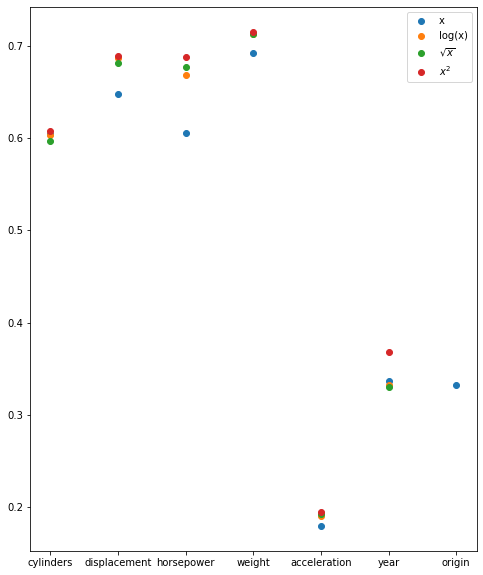

In [73]:
with plt.rc_context({'figure.figsize': (8,10)}):
    tempdf.plot(marker='o', markersize=6, linestyle='')

#### Regression model with transformed variables
Transforming only those variables for which r-sqaured increased after transformation.  
(Increase for acceleration was was 0.01 only, so it has been included without transformation)

##### mres3 - x variables transformed

In [74]:
mres3 = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + \
                year + origin + np.power(displacement,2) + np.power(horsepower,2) + \
                np.power(weight,2) + np.power(year,2)', data=df).fit()    # don't use I(x^2)
mres3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     225.9
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          2.32e-164
Time:                        01:29:19   Log-Likelihood:                -949.91
No. Observations:                 392   AIC:                             1926.
Df Residuals:                     379   BIC:                             1977.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   418.5242     69.658      6.008      0.000     281.560     555.488
origin[T.euro]                1.3226      0.530      2.494      0.013       0.280       2.365
origin[T.jap]                 1.2579      0.513      2.452      0.015       0.249       2.266
cylinders                     0.5073      0.319      1.590      0.113      -0.120       1.135
displacement                 -0.0333      0.020     -1.627      0.104      -0.073       0.007
horsepower                   -0.1781      0.040     -4.506      0.000      -0.256      -0.100
weight                       -0.0111      0.003     -4.306      0.000      -0.016      -0.006
acceleration                 -0.1700      0.097     -1.762      0.079      -0.360       0.020
year                        -10.1904      1.837     -5.546      0.000     -13.803      -6.578
np.power(displacement, 2)  5.839e-05   3.44e-05      1.700      0.090   -9.15e-06       0.000
np.power(horsepower, 2)       0.0004      0.000      3.284      0.001       0.000       0.001
np.power(weight, 2)        1.182e-06   3.44e-07      3.439      0.001    5.06e-07    1.86e-06
np.power(year, 2)             0.0721      0.012      5.974      0.000       0.048       0.096
==============================================================================
Omnibus:                       37.605   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.966
Skew:                           0.468   Prob(JB):                     3.94e-21
Kurtosis:                       5.208   Cond. No.                     5.48e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

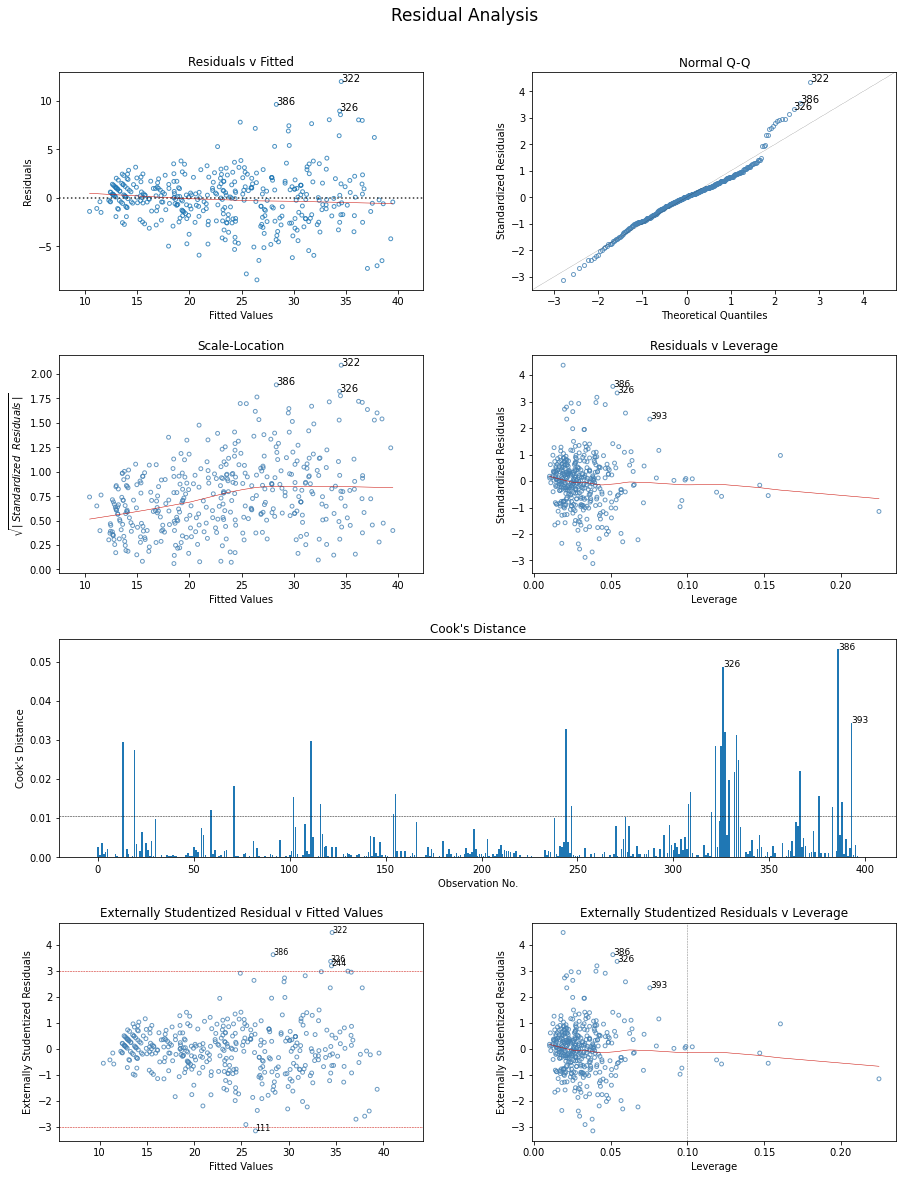

In [75]:
# Diagnostic plots
lm_diagnostic_plots2(mres3, df, 'mpg')

<div class="alert alert-block alert-info">
Curve has gone from the residual v fit plot, but there is still a funnel shape to them. We can try a log transformation of the response variable to adjust for that.<br>
</div>

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

##### mres4 - y and x transformed

In [76]:
# model with response transformed : log(y)
mres4 = smf.ols('np.log(mpg) ~ cylinders + displacement + horsepower + weight + acceleration + \
                year + origin + np.power(displacement,2) + np.power(horsepower,2) + \
                np.power(weight,2) + np.power(year,2)', data=df).fit()    # don't use I(x^2)
mres4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     286.4
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          1.12e-181
Time:                        01:29:22   Log-Likelihood:                 319.79
No. Observations:                 392   AIC:                            -613.6
Df Residuals:                     379   BIC:                            -561.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    15.2182      2.731      5.573      0.000       9.849      20.588
origin[T.euro]                0.0424      0.021      2.039      0.042       0.002       0.083
origin[T.jap]                 0.0342      0.020      1.699      0.090      -0.005       0.074
cylinders                     0.0072      0.013      0.576      0.565      -0.017       0.032
displacement                 -0.0019      0.001     -2.411      0.016      -0.004      -0.000
horsepower                   -0.0051      0.002     -3.303      0.001      -0.008      -0.002
weight                       -0.0002      0.000     -2.225      0.027      -0.000   -2.62e-05
acceleration                 -0.0077      0.004     -2.028      0.043      -0.015      -0.000
year                         -0.3160      0.072     -4.387      0.000      -0.458      -0.174
np.power(displacement, 2)  3.748e-06   1.35e-06      2.783      0.006     1.1e-06     6.4e-06
np.power(horsepower, 2)    8.077e-06   5.24e-06      1.542      0.124   -2.22e-06    1.84e-05
np.power(weight, 2)        9.347e-09   1.35e-08      0.693      0.488   -1.72e-08    3.59e-08
np.power(year, 2)             0.0023      0.000      4.808      0.000       0.001       0.003
==============================================================================
Omnibus:                        8.365   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               11.447
Skew:                          -0.170   Prob(JB):                      0.00327
Kurtosis:                       3.765   Cond. No.                     5.48e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

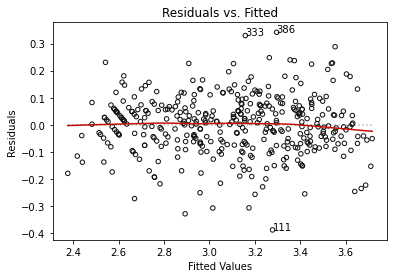

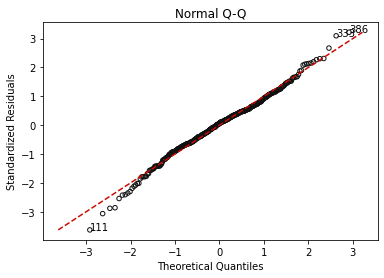

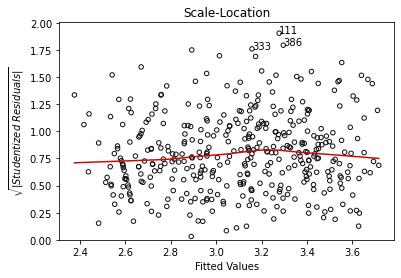

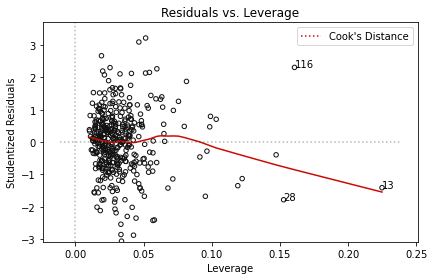

In [77]:
lm_diagnostic_plots(mres4)

<div class="alert alert-block alert-info">
We can see that the assumptions of linearity and equal variance are now held up by the residuals vs fitted plot and the scale-location plot. There is no noticable curve or shape in the scatter. QQ plot also seems to uphold the normality assumption.<br>
Adj. R-squared value for the model is very high at 0.898.<br><br>
We can try to improve upon this model by adding interactions that were found to be significant.
</div>

In [78]:
# Statistically insignificant variables
pd.concat([mres4.params[mres4.pvalues > 0.05], mres4.pvalues[mres4.pvalues > 0.05]], axis=1, 
           keys=['coef', 'pvalue']).round(4)

coef  pvalue
origin[T.jap]            0.0342  0.0901
cylinders                0.0072  0.5647
np.power(horsepower, 2)  0.0000  0.1238
np.power(weight, 2)      0.0000  0.4885

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

##### mres5

In [79]:
mres5 = smf.ols('np.log(mpg) ~ cylinders + displacement + horsepower + weight + acceleration + \
                year + origin + np.power(displacement,2) + np.power(horsepower,2) + \
                np.power(weight,2) + np.power(year,2) + \
                acceleration:origin + acceleration:year + weight:origin + weight:year',
                data=df).fit()
mres5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     206.1
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          3.03e-181
Time:                        01:29:23   Log-Likelihood:                 336.17
No. Observations:                 392   AIC:                            -634.3
Df Residuals:                     373   BIC:                            -558.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      18.1763      3.161      5.750      0.000      11.961      24.392
origin[T.euro]                 -0.3328      0.121     -2.755      0.006      -0.570      -0.095
origin[T.jap]                  -0.4840      0.217     -2.227      0.027      -0.911      -0.057
cylinders                      -0.0056      0.012     -0.457      0.648      -0.030       0.019
displacement                   -0.0006      0.001     -0.768      0.443      -0.002       0.001
horsepower                     -0.0046      0.002     -2.821      0.005      -0.008      -0.001
weight                         -0.0010      0.000     -3.873      0.000      -0.002      -0.001
weight:origin[T.euro]        1.286e-05    3.8e-05      0.339      0.735   -6.18e-05    8.76e-05
weight:origin[T.jap]         8.151e-05   5.55e-05      1.468      0.143   -2.77e-05       0.000
acceleration                   -0.2032      0.052     -3.916      0.000      -0.305      -0.101
acceleration:origin[T.euro]     0.0202      0.006      3.505      0.001       0.009       0.032
acceleration:origin[T.jap]      0.0204      0.008      2.439      0.015       0.004       0.037
year                           -0.3233      0.078     -4.119      0.000      -0.478      -0.169
np.power(displacement, 2)     9.15e-07   1.43e-06      0.642      0.521   -1.89e-06    3.72e-06
np.power(horsepower, 2)      6.874e-06   5.51e-06      1.248      0.213   -3.96e-06    1.77e-05
np.power(weight, 2)          4.963e-08   1.75e-08      2.841      0.005    1.53e-08     8.4e-08
np.power(year, 2)               0.0019      0.001      3.830      0.000       0.001       0.003
acceleration:year               0.0024      0.001      3.588      0.000       0.001       0.004
weight:year                  7.192e-06   2.78e-06      2.583      0.010    1.72e-06    1.27e-05
==============================================================================
Omnibus:                       12.193   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               23.152
Skew:                          -0.108   Prob(JB):                     9.39e-06
Kurtosis:                       4.171   Cond. No.                     6.57e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
# Statistically insignificant variables
pd.concat([mres5.params[mres5.pvalues > 0.05], mres5.pvalues[mres5.pvalues > 0.05]], axis=1, 
           keys=['coef', 'pvalue']).round(4)

coef  pvalue
cylinders                 -0.0056  0.6480
displacement              -0.0006  0.4428
weight:origin[T.euro]      0.0000  0.7351
weight:origin[T.jap]       0.0001  0.1431
np.power(displacement, 2)  0.0000  0.5214
np.power(horsepower, 2)    0.0000  0.2129

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

##### Final regression model

In [81]:
mres6 = smf.ols('np.log(mpg) ~ horsepower + weight + acceleration + year + origin + \
                np.power(weight,2) + np.power(year,2) + \
                acceleration:origin + acceleration:year + weight:year',
                data=df).fit()
mres6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     305.7
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          1.64e-186
Time:                        01:29:23   Log-Likelihood:                 331.33
No. Observations:                 392   AIC:                            -636.7
Df Residuals:                     379   BIC:                            -585.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      17.0708      3.107      5.494      0.000      10.961      23.181
origin[T.euro]                 -0.2969      0.089     -3.322      0.001      -0.473      -0.121
origin[T.jap]                  -0.1558      0.115     -1.353      0.177      -0.382       0.071
horsepower                     -0.0024      0.000     -5.462      0.000      -0.003      -0.002
weight                         -0.0010      0.000     -4.353      0.000      -0.001      -0.001
acceleration                   -0.2092      0.047     -4.430      0.000      -0.302      -0.116
acceleration:origin[T.euro]     0.0212      0.005      4.020      0.000       0.011       0.032
acceleration:origin[T.jap]      0.0122      0.007      1.689      0.092      -0.002       0.026
year                           -0.3011      0.078     -3.861      0.000      -0.454      -0.148
np.power(weight, 2)          5.706e-08   9.59e-09      5.951      0.000    3.82e-08    7.59e-08
np.power(year, 2)               0.0018      0.001      3.606      0.000       0.001       0.003
acceleration:year               0.0026      0.001      4.139      0.000       0.001       0.004
weight:year                  5.443e-06   2.59e-06      2.099      0.036    3.45e-07    1.05e-05
==============================================================================
Omnibus:                       13.111   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.351
Skew:                          -0.175   Prob(JB):                     8.50e-06
Kurtosis:                       4.143   Cond. No.                     6.43e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.43e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

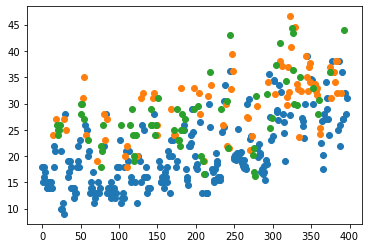

In [82]:
# mpgs for different origins
plt.plot(df.mpg[df.origin=='amer'], marker='o', linestyle='')
plt.plot(df.mpg[df.origin=='jap'], marker='o', linestyle='')
plt.plot(df.mpg[df.origin=='euro'], marker='o', linestyle='');

###### Diagnostic plots

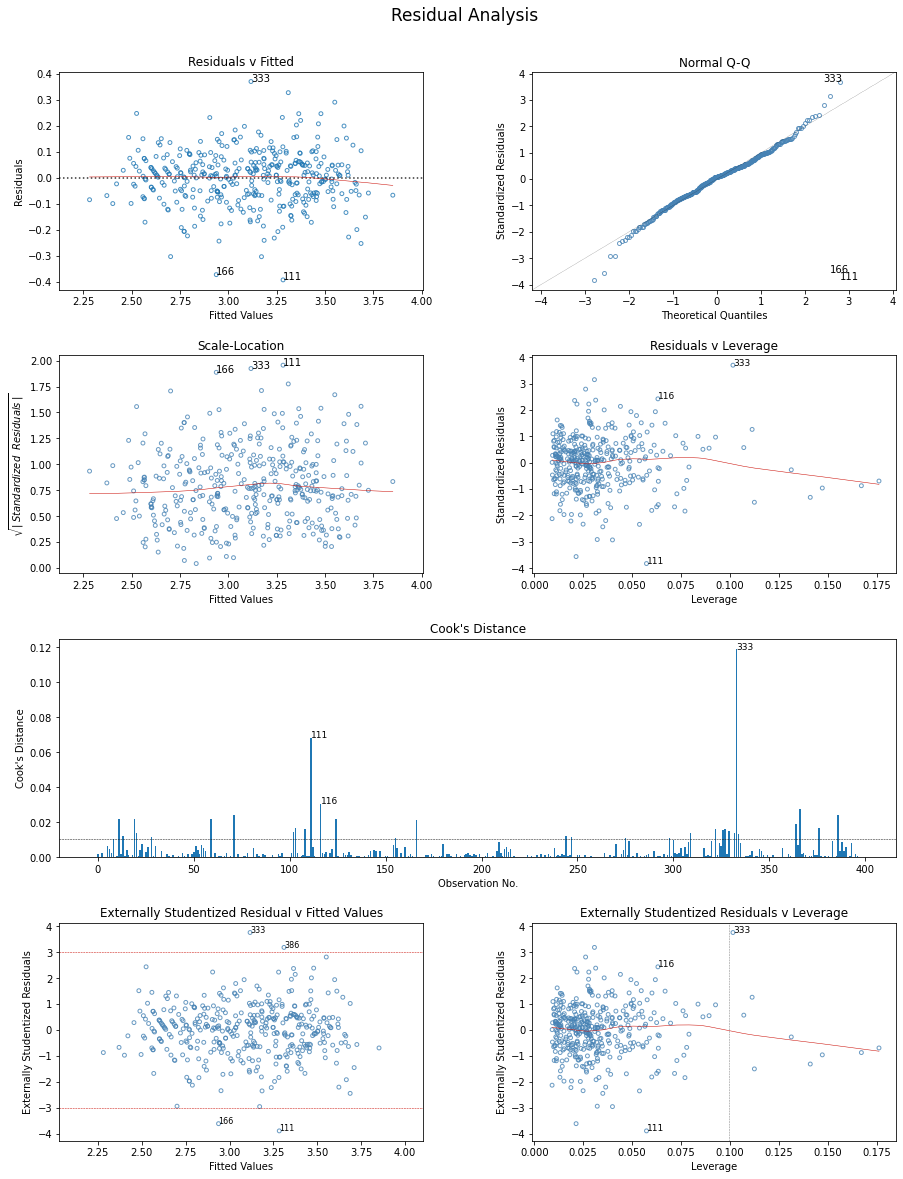

In [83]:
# Diagnostic plots
lm_diagnostic_plots2(mres6, df, 'mpg', xlims=True)

<a id='obs-mres6'></a><div class="alert alert-block alert-info">
<h5>Observations</h5>
    - The final regression model contains:<br>
    a) $y$ &rarr; log(mpg) <br>
    &emsp; regressed on <br>
    b) $x$ &rarr; horsepower, acceleration, origin<br>
    c) $x + x^2$ &rarr; weight, year<br>
    d) interactions &rarr; acceleration:origin + acceleration:year + weight:year<br><br>
    $Adj\ R^2\ = 0.903$
</div>


#### Adj R-squared results from regression models butil
0.606 &emsp; mpg ~ horsepower  
0.821 &emsp; mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin  
0.863 &emsp; mpg ~ weight + acceleration + origin + year + weight:acceleration + weight:origin + weight:year + acceleration:origin + <br>&emsp; &emsp; &emsp;&nbsp; acceleration:year + origin:year<br>
0.903 &emsp; np.log(mpg) ~ horsepower + weight + acceleration + year + origin + np.power(weight,2) + np.power(year,2) + acceleration:origin + &emsp; &emsp; &emsp; &emsp; &emsp;&nbsp; acceleration:year + weight:year'

[go to toc](#index)

#### --&nbsp; <i>Workings</i> &nbsp; --------------------------------------------------------------

##### cylinders

rsq : 0.6046889889441246
p-value : 1.3113836370988336e-80


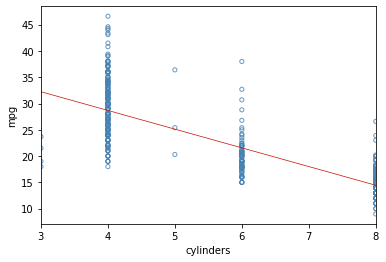

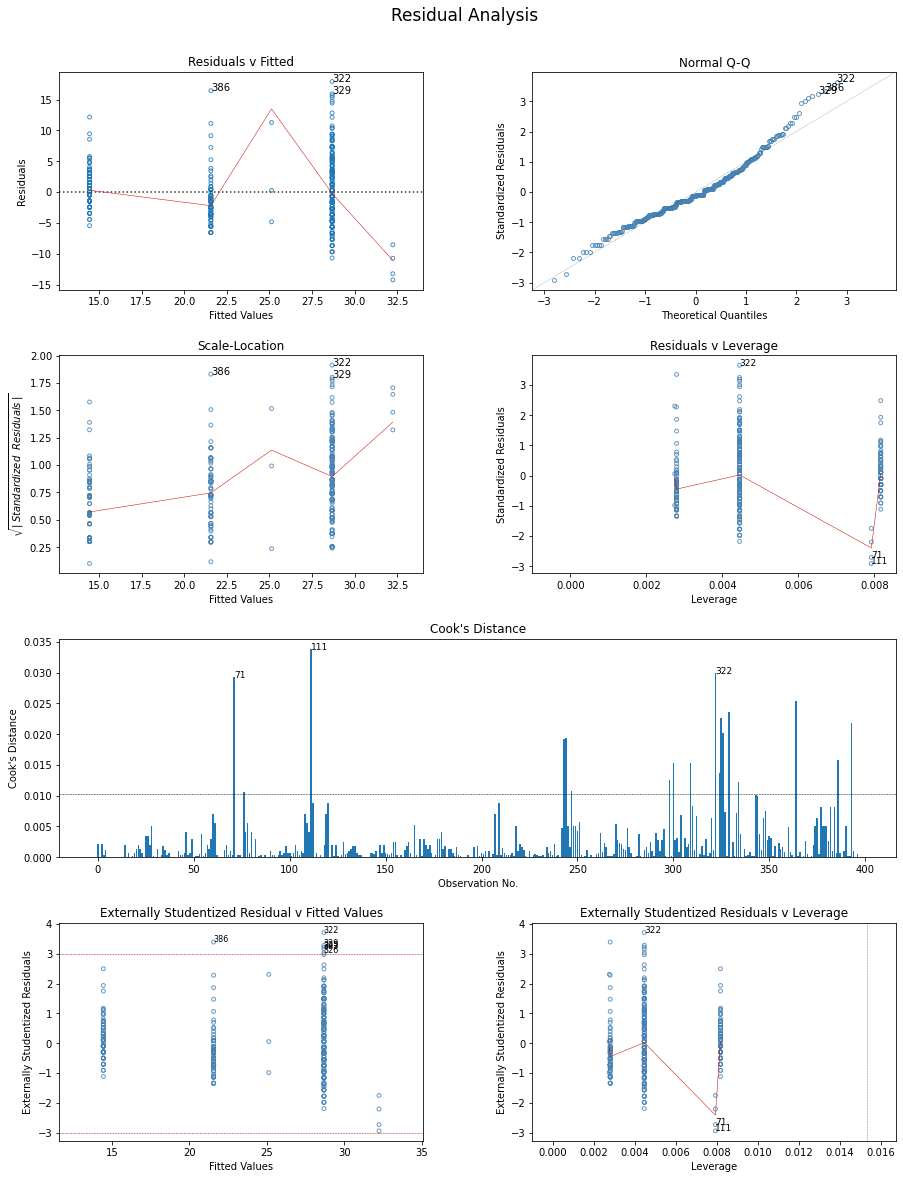

In [84]:
# Trasformation : none
transformation_result(df.mpg, df.cylinders, df, 'mpg', 'no', diag_plots=True, rsq_only=False)

rsq : 0.6074524159772413
p-value : 1.0281442707414772e-79


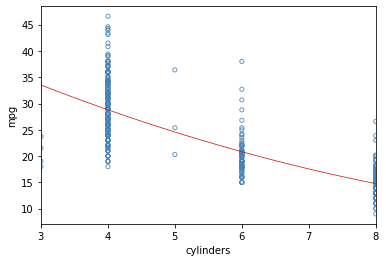

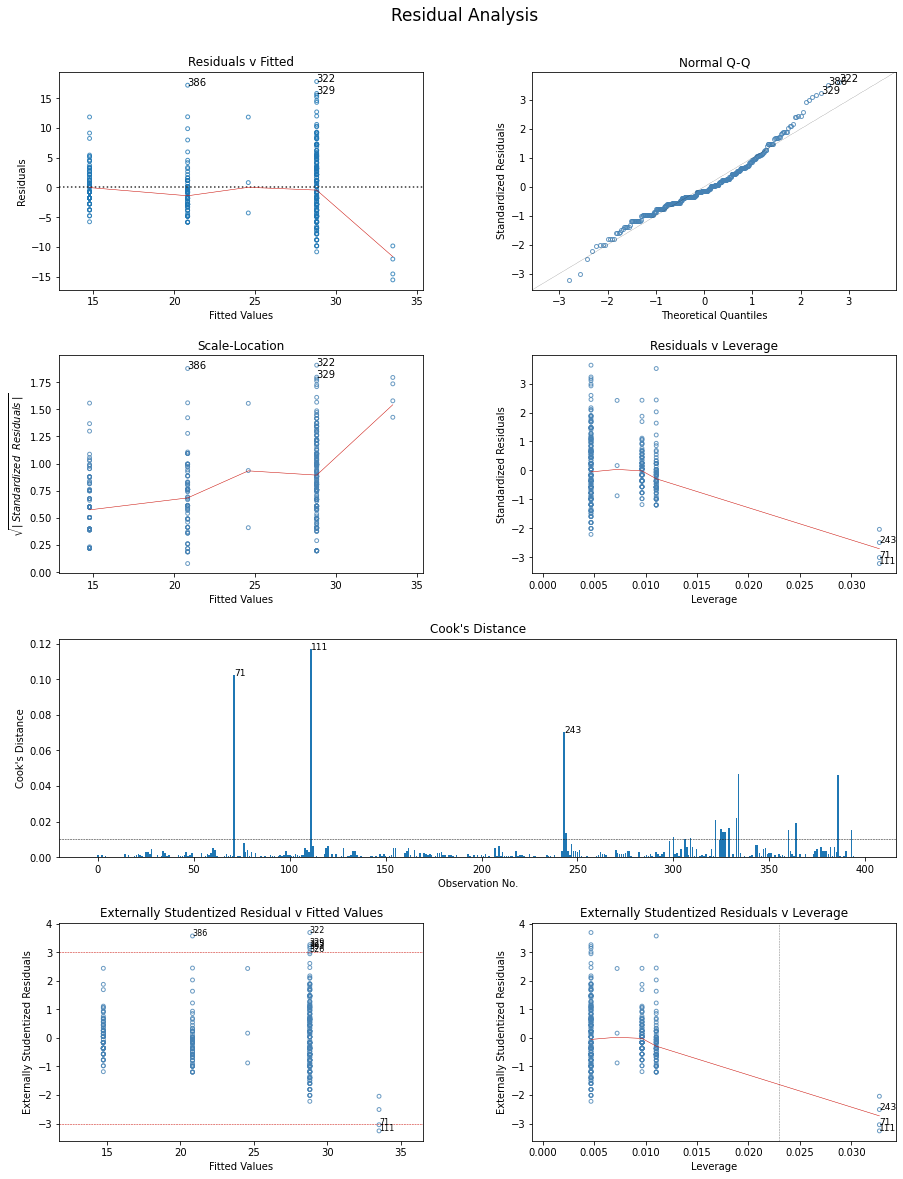

In [85]:
# Trasformation : x^2
transformation_result(df.mpg, df.cylinders, df, 'mpg', 2, diag_plots=True, rsq_only=False)

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

##### displacement

rsq : 0.6863348898210173
p-value : 3.1496922269887e-100


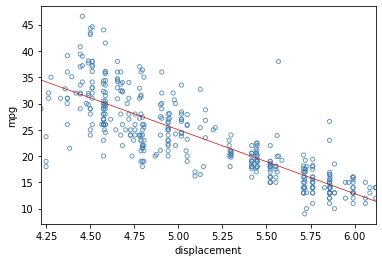

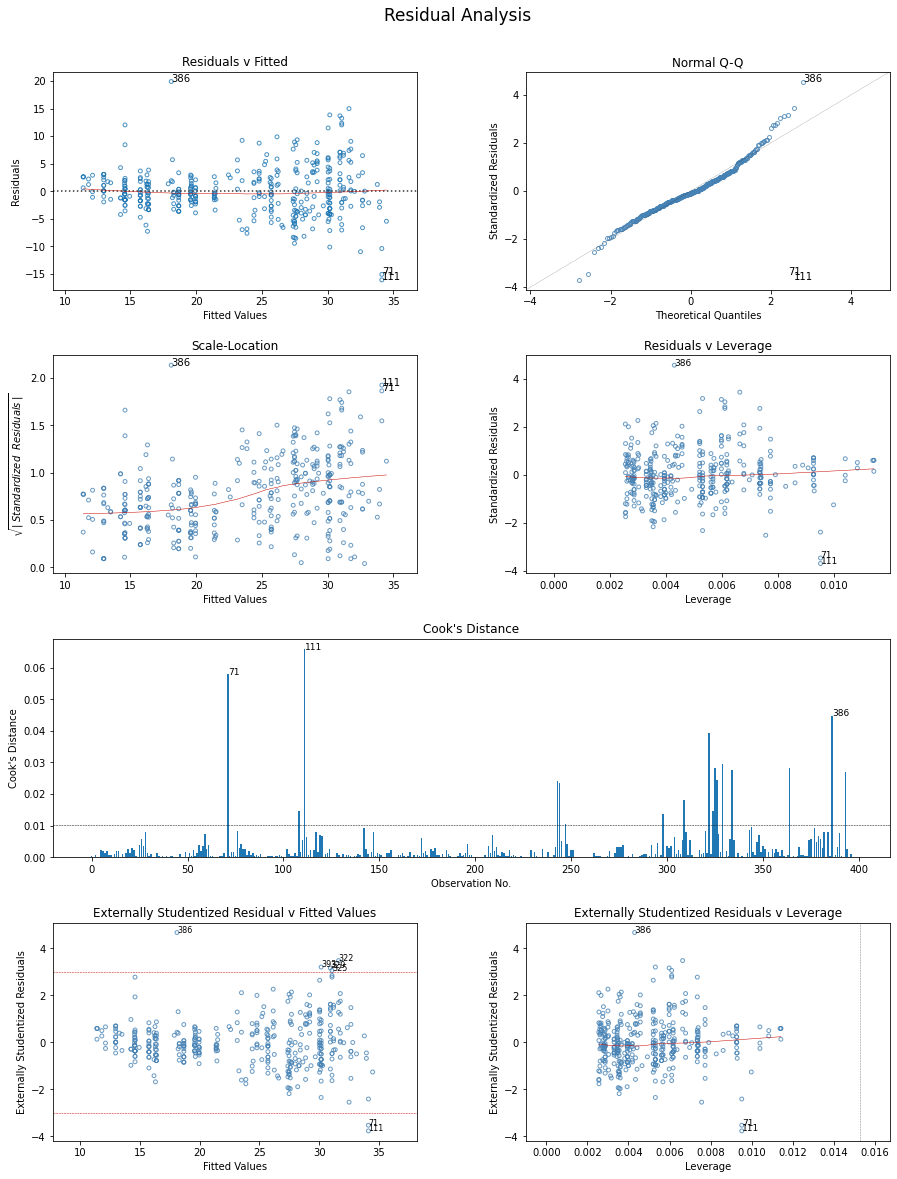

In [86]:
# Trasformation : log(x)
transformation_result(df.mpg, df.displacement, df, 'mpg', 'log', diag_plots=True, rsq_only=False)

rsq : 0.688808733323848
p-value : 2.4764489116115187e-99


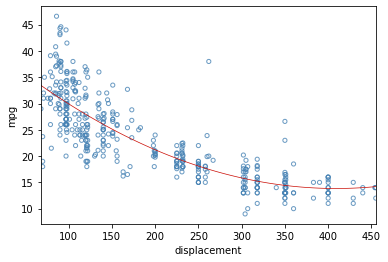

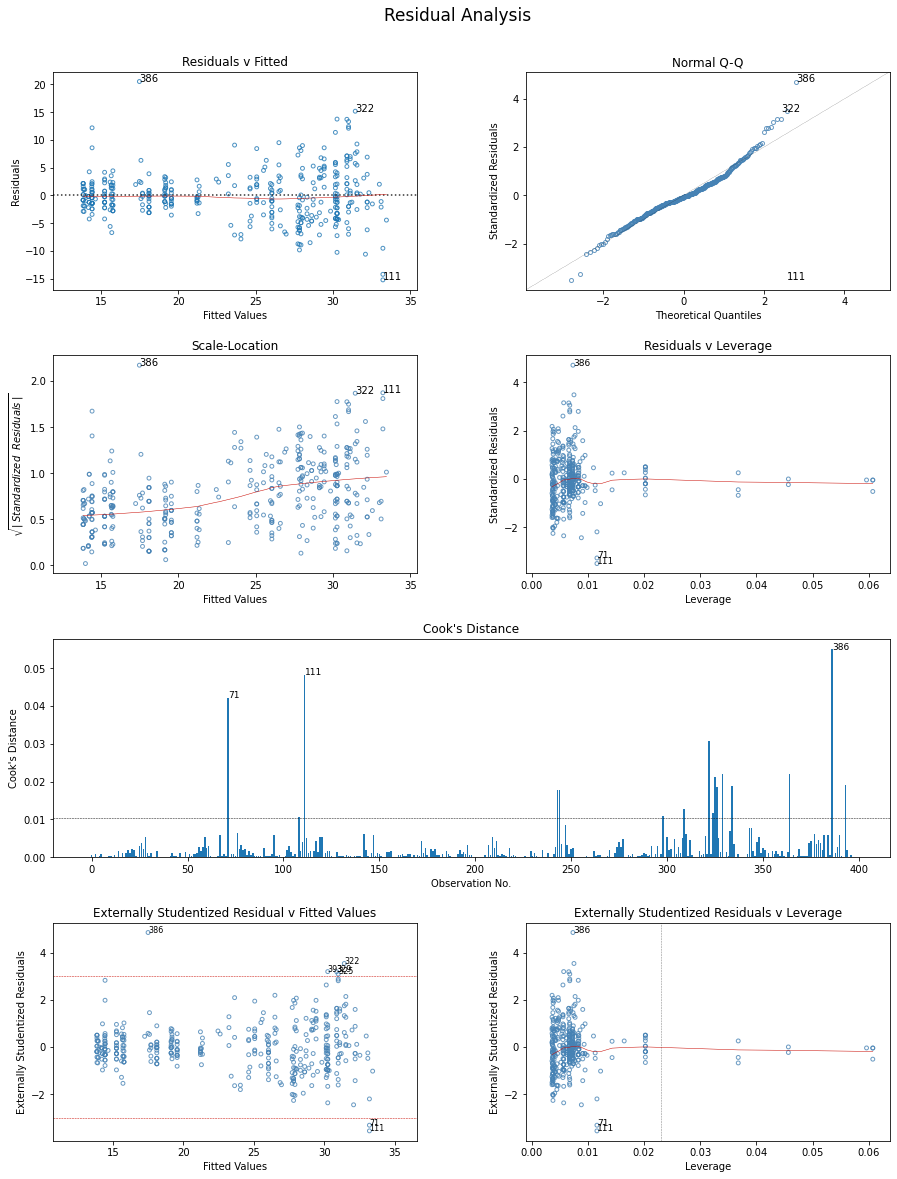

In [87]:
# Trasformation : x^2
transformation_result(df.mpg, df.displacement, df, 'mpg', 2, diag_plots=True, rsq_only=False)

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

##### weight

rsq : 0.7126631343895841
p-value : 1.1629335827542907e-107


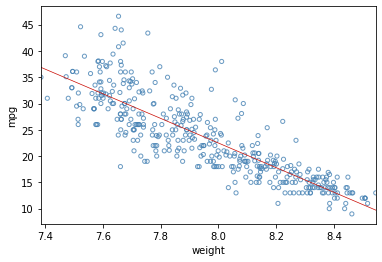

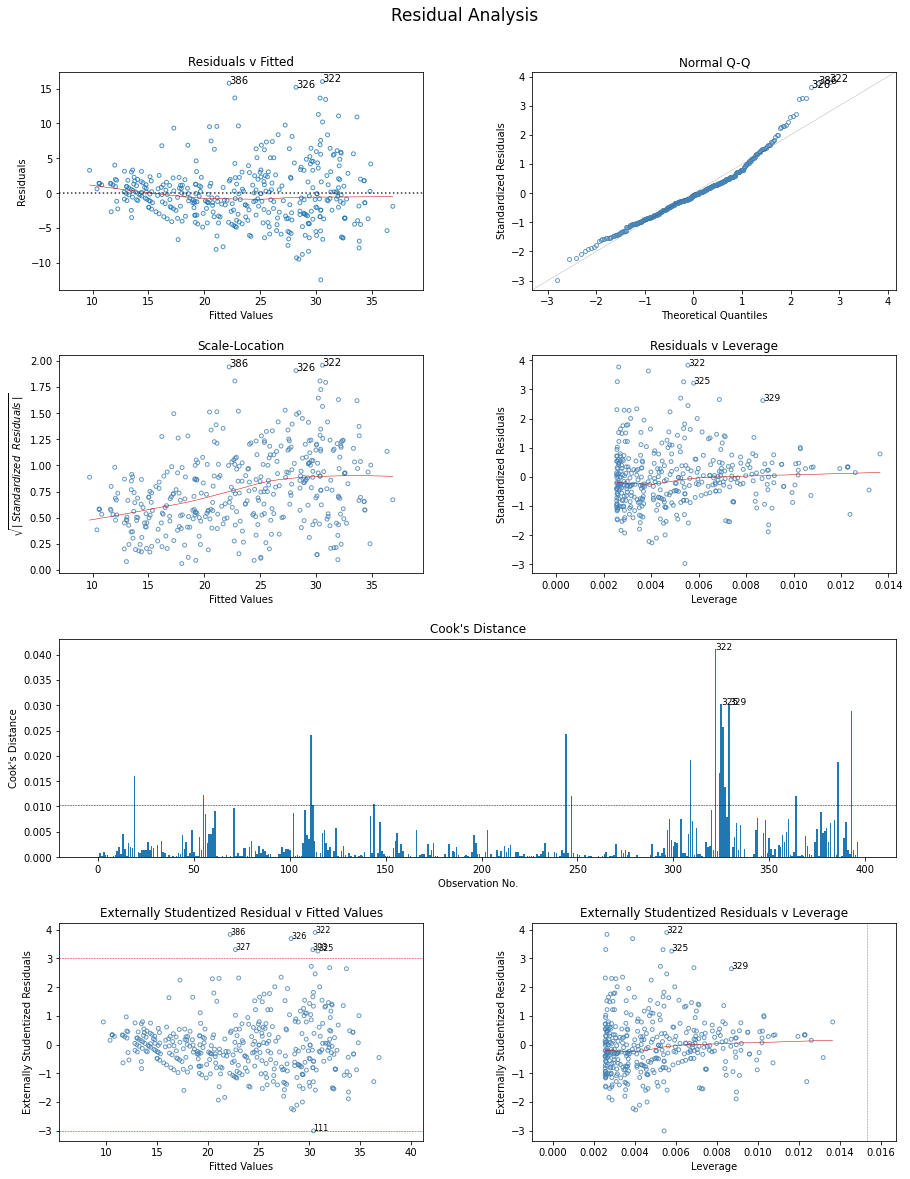

In [88]:
# Trasformation : log(x)
transformation_result(df.mpg, df.weight, df, 'mpg', 'log', diag_plots=True, rsq_only=False)

rsq : 0.7151475557845139
p-value : 8.386492049354918e-107


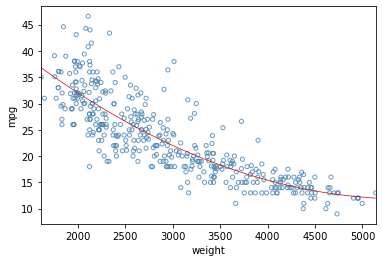

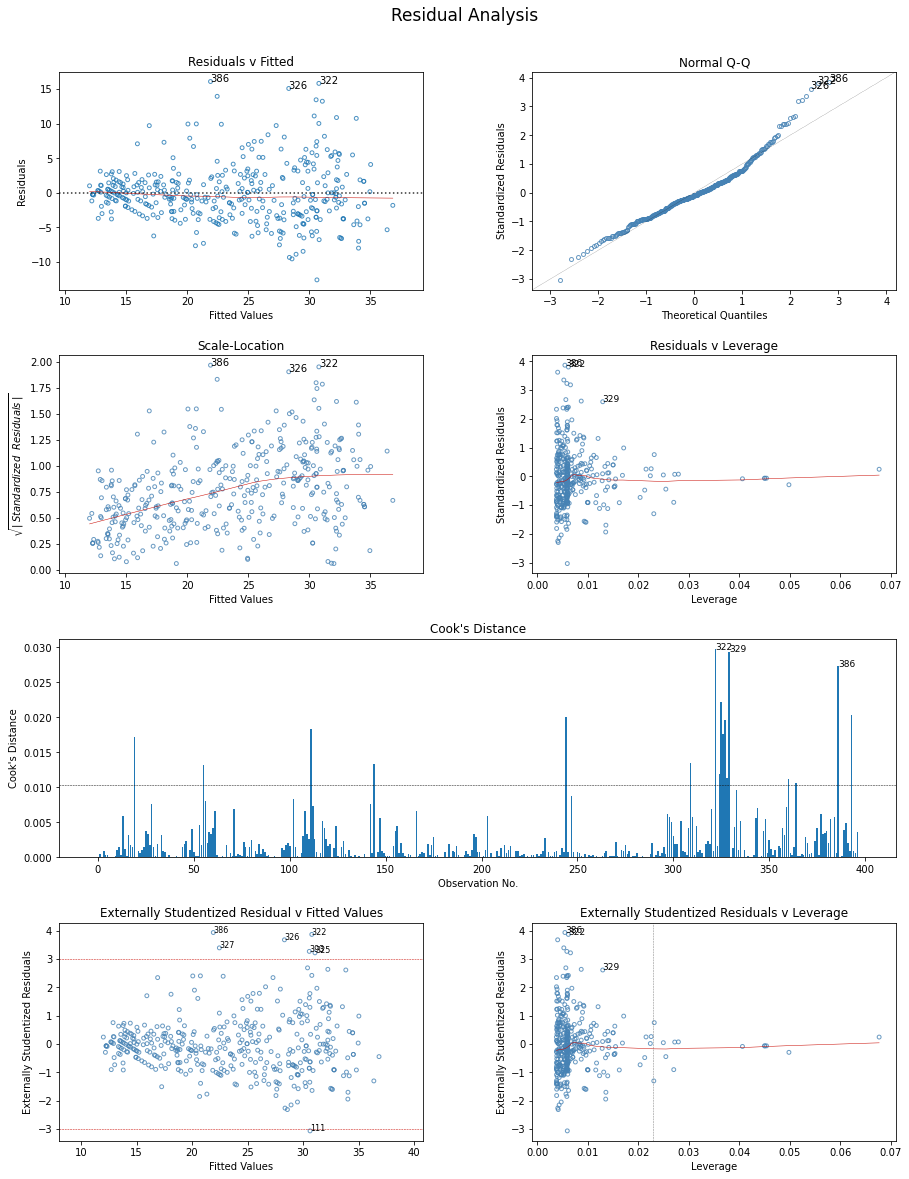

In [89]:
# Trasformation : x^2
transformation_result(df.mpg, df.weight, df, 'mpg', 2, diag_plots=True, rsq_only=False)

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

##### acceleration

rsq : 0.19000944491763905
p-value : 1.3053634207500756e-19


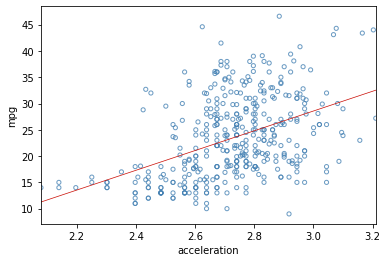

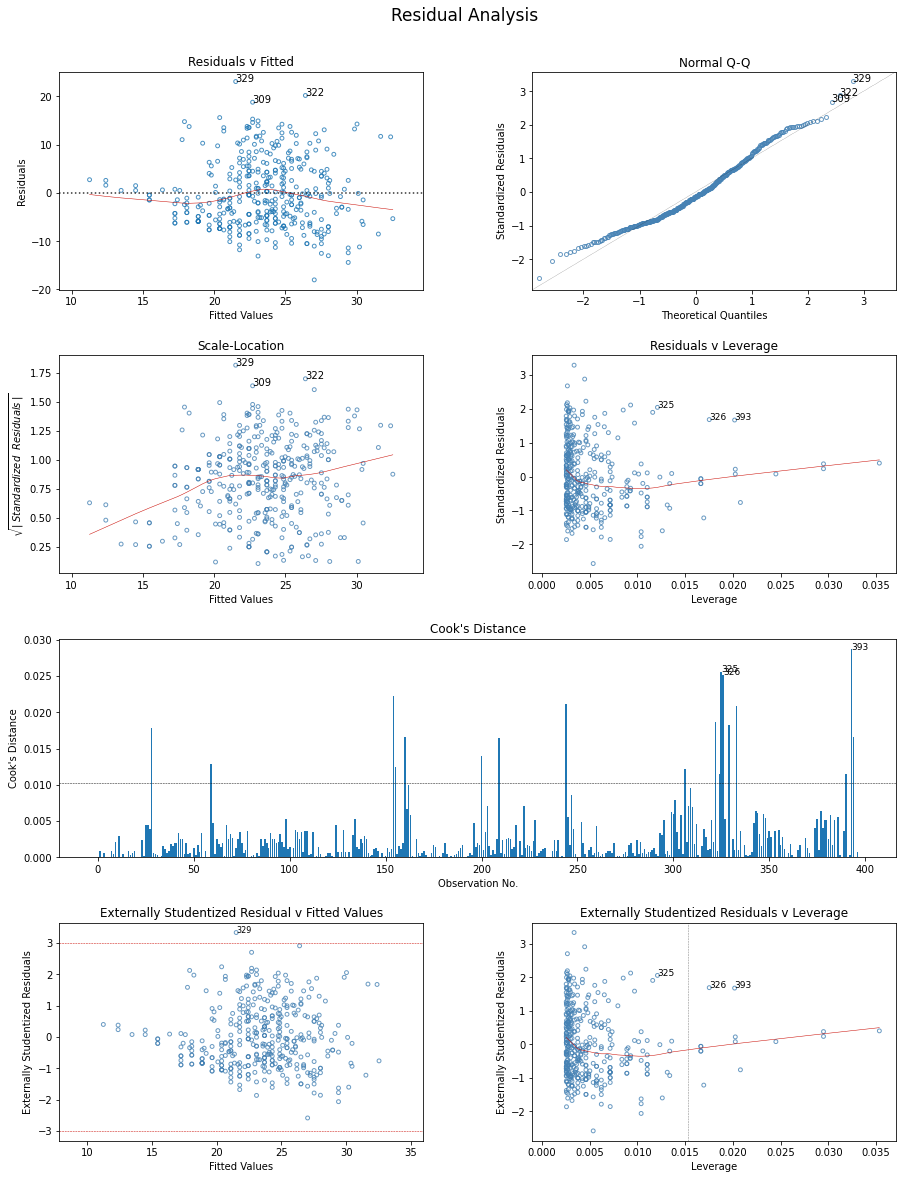

In [90]:
# Trasformation : log(x)
transformation_result(df.mpg, df.acceleration, df, 'mpg', 'log', diag_plots=True, rsq_only=False)

rsq : 0.1939640110321763
p-value : 6.108537673281292e-19


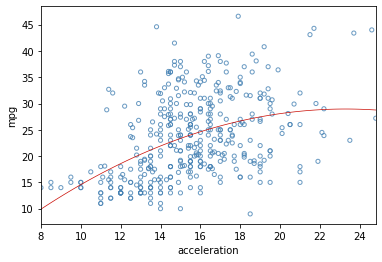

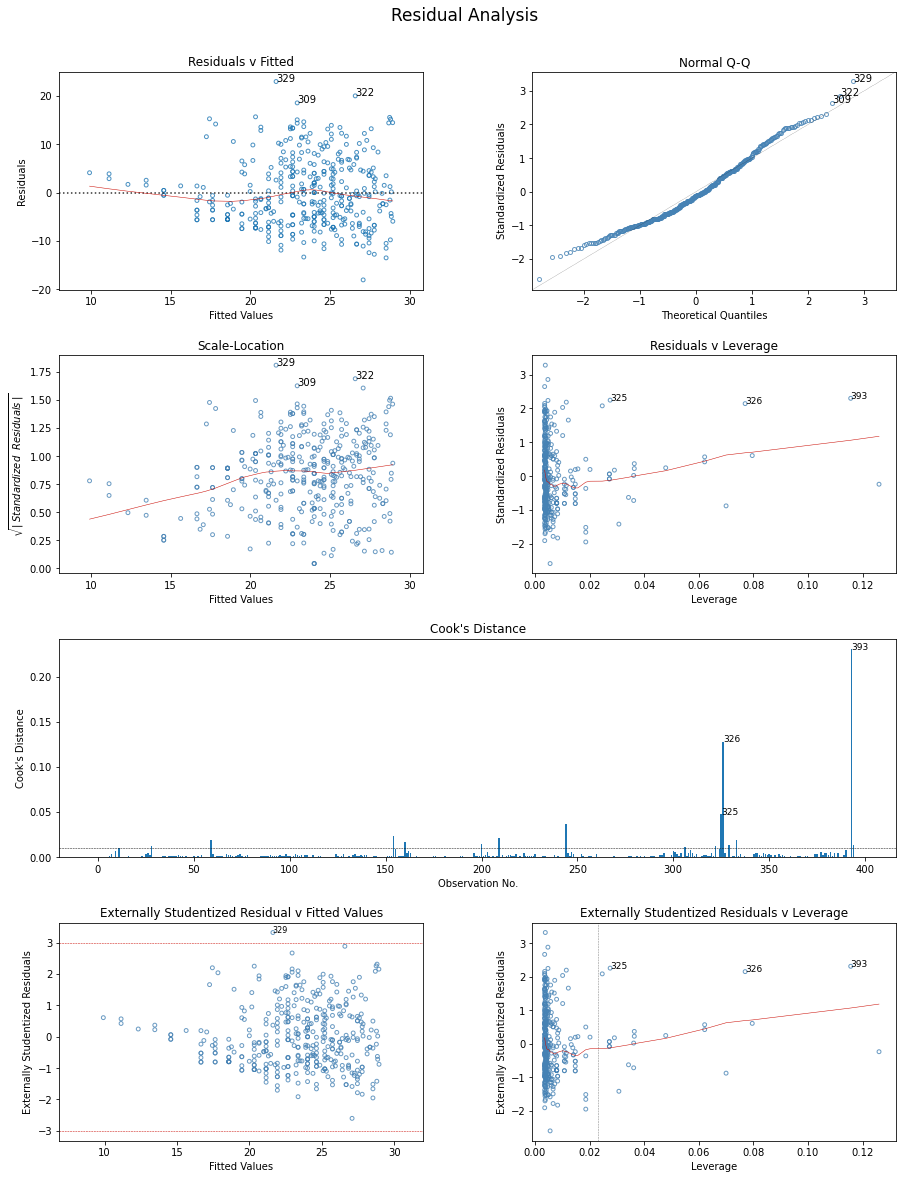

In [91]:
# Trasformation : x^2
transformation_result(df.mpg, df.acceleration, df, 'mpg', 2, diag_plots=True, rsq_only=False)

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

##### horsepower

rsq : 0.6683347641192137
p-value : 1.6965825543304893e-95


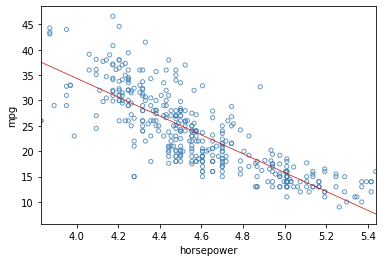

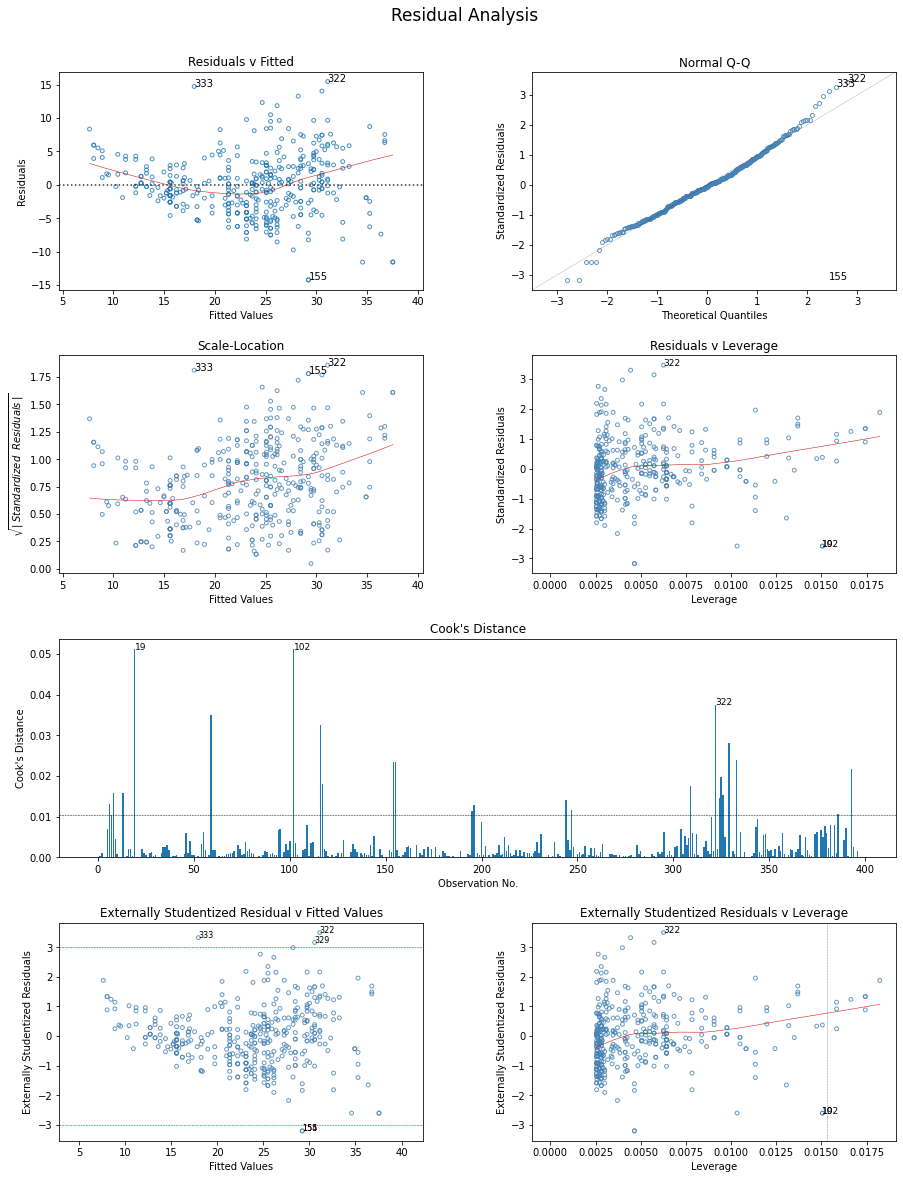

In [92]:
# Trasformation : log(x)
transformation_result(df.mpg, df.horsepower, df, 'mpg', 'log', diag_plots=True, rsq_only=False)

rsq : 0.6875590305127516
p-value : 5.3997229004733075e-99


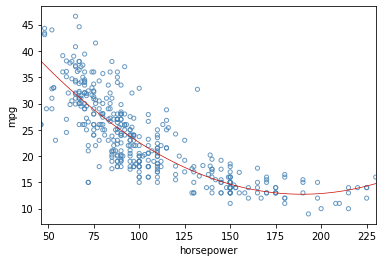

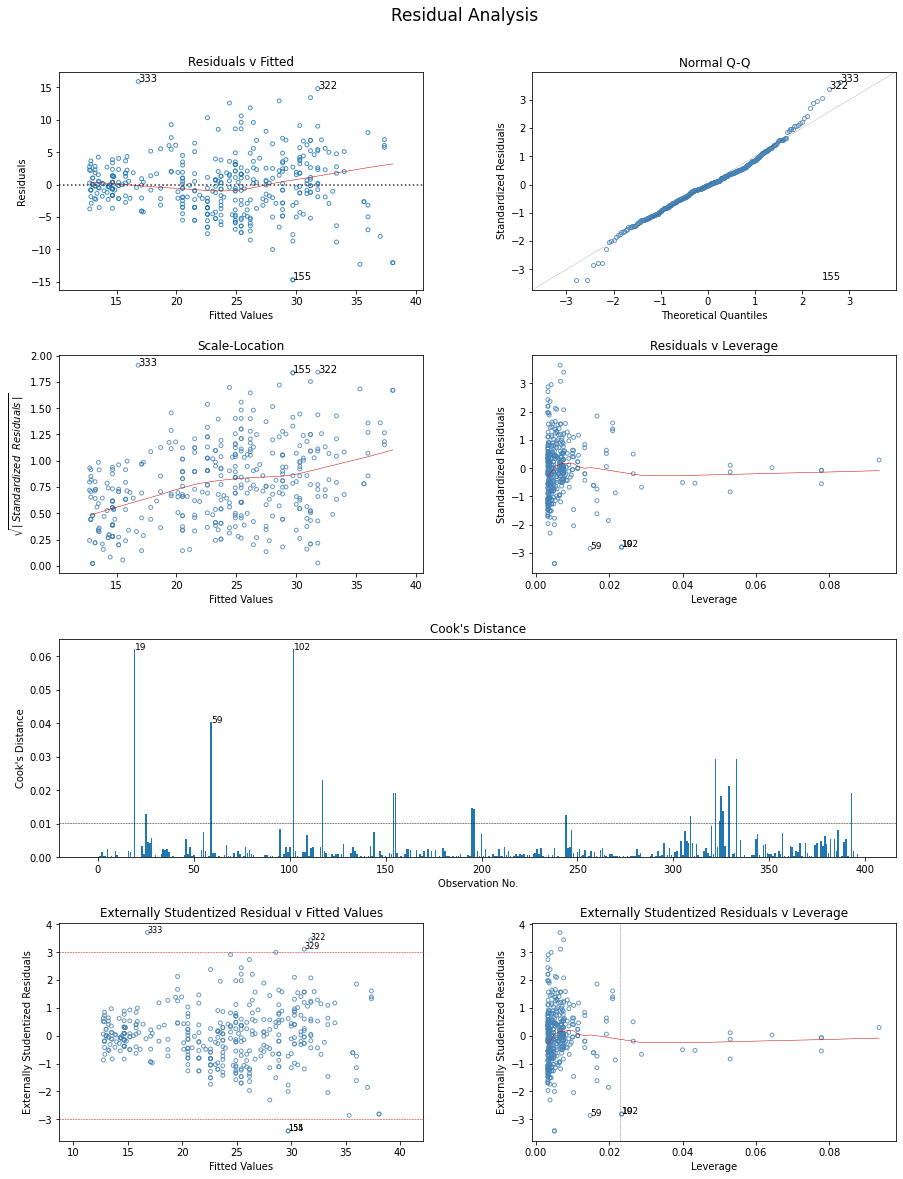

In [93]:
# Trasformation : x^2
transformation_result(df.mpg, df.horsepower, df, 'mpg', 2, diag_plots=True, rsq_only=False)

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

##### year

rsq : 0.3370278133096227
p-value : 1.0757935564157494e-36


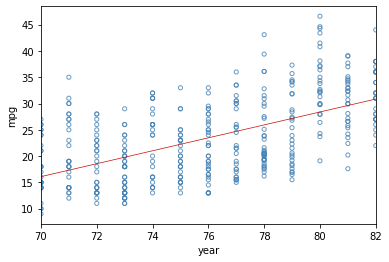

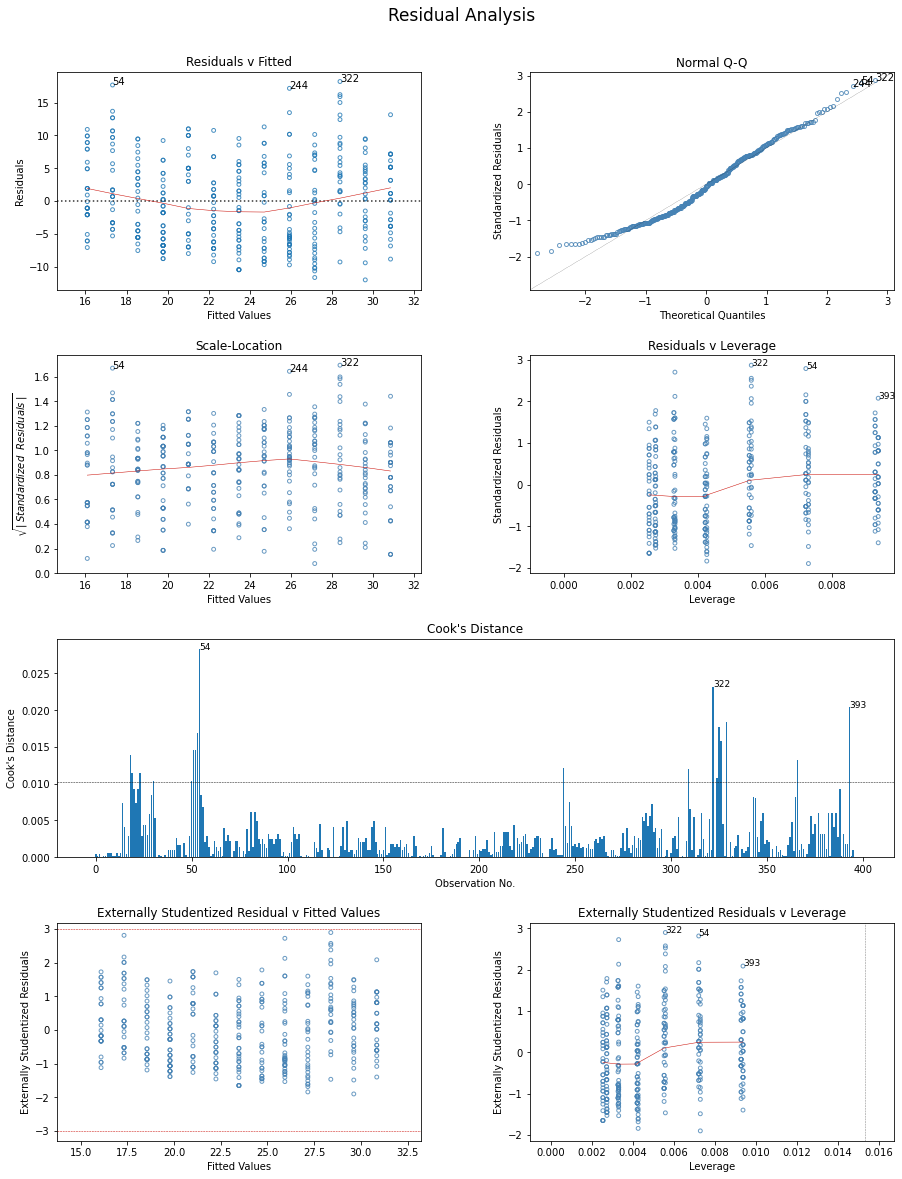

In [94]:
# Trasformation : none
transformation_result(df.mpg, df.year, df, 'mpg', 'no', diag_plots=True, rsq_only=False)

rsq : 0.3675258408630112
p-value : 2.0082692645263813e-39


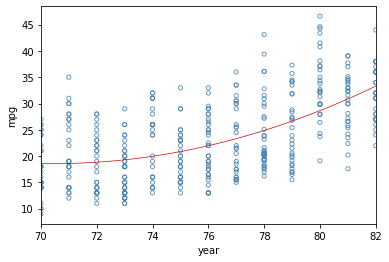

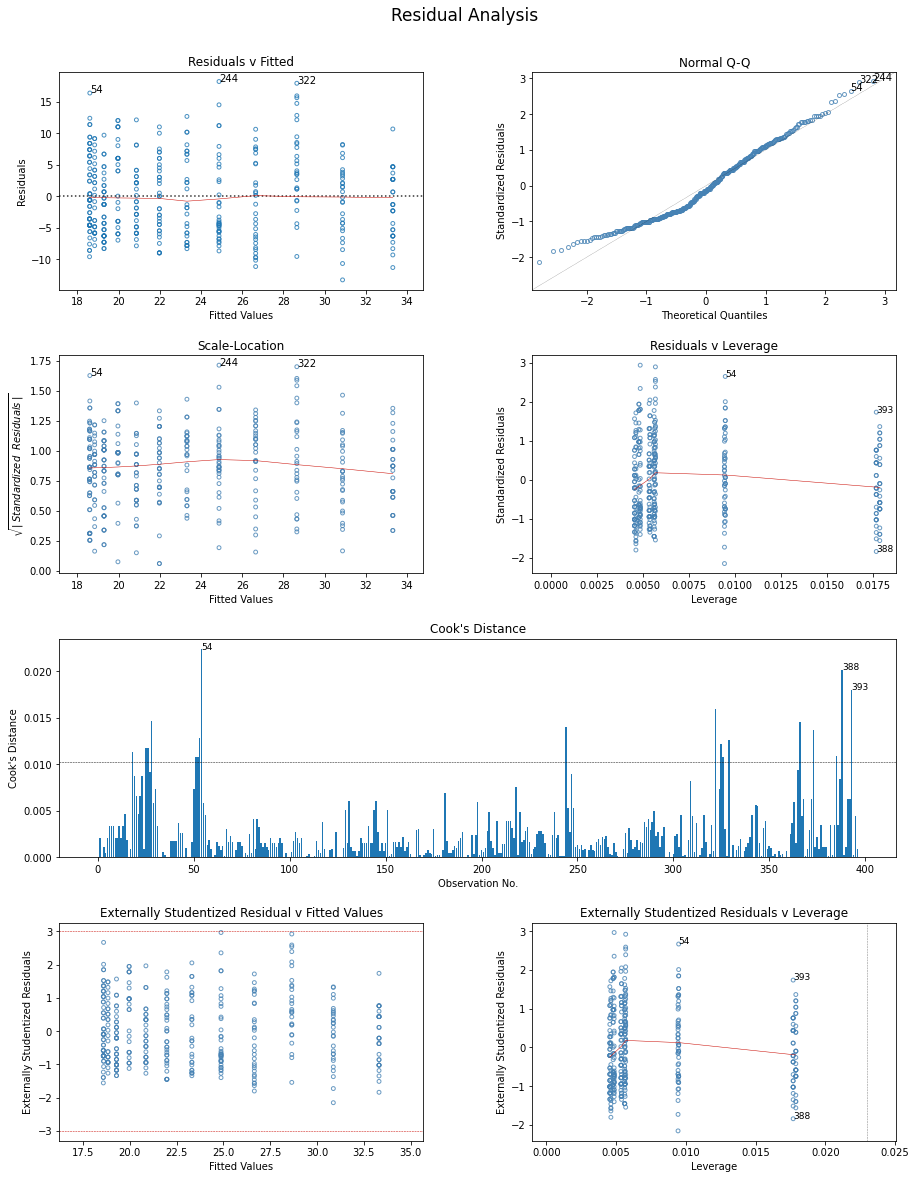

In [95]:
# Trasformation : x^2
transformation_result(df.mpg, df.year, df, 'mpg', 2, diag_plots=True, rsq_only=False)

<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### References

https://www.kaggle.com/lmorgan95/notebooks  
https://botlnec.github.io/islp/  
https://github.com/a-martyn/ISL-python  
https://onmee.github.io/ISLR-Solutions/  
https://github.com/emredjan/ISL-python  

<table>
<tr style="background-color:white">
    <th><b>-------------------------------------------- &ensp; &nbsp;</b></th>
    <th>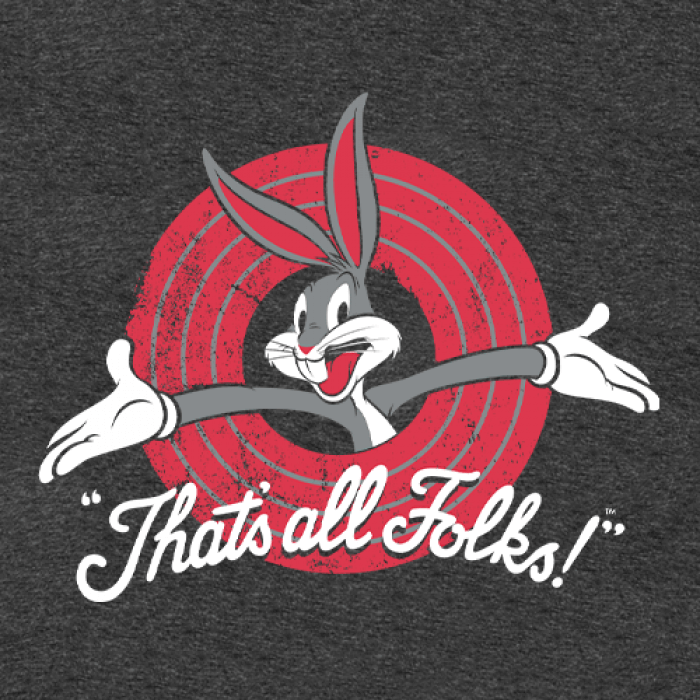</th><th style="float:right"></th>
    <th><b> &ensp;--------------------------------------------</b></th>
</tr>
</table>